# Assess association with clinical outcomes and visualize results

In contrast to v0, this version, we use the definition of cancer reactive obtained from combined study

In [33]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
cell_data_CD8 = pd.read_csv("cell_meta_data_CD8_cleaned.csv", index_col=0)
cell_data_CD8.index = cell_data_CD8.index + "-Liu_2025_CD8"
cell_data_CD8.index.name = "cell_id"
cell_data_CD8 = cell_data_CD8.rename(columns={"sampleID": "Patient"})
cell_data_CD8



,cell_type,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Patient,sub_cell_type,TRA_v_gene,TRA_j_gene,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1-AAAGCAAGTTATCCGA-1-Liu_2025_CD8,CD8,0.403771,0.371335,0.228652,0.565556,0.900588,1.296815,0.218619,1.502854,-0.330965,True,4,True,True,P1,CD8T_ISG15,TRAV20,TRAJ10,TRAC,CAVTRGGGNKLTF,TRBV2,TRBJ1-1,TRBC1,CASSPFWGNTEAFF,P1_clonetype_23,expanded,33,CD8Texp
P1-AACCGCGGTCAACATC-1-Liu_2025_CD8,CD8,0.245485,0.100395,-0.052808,0.168940,0.331256,1.381153,0.557395,-0.862527,1.338391,False,0,False,False,P1,CD8T_ISG15,TRAV14/DV4,TRAJ21,TRAC,CAMREGGDNFNKFYF,TRBV6-5,TRBJ2-5,TRBC2,CASSYSILAGAPLSEETQYF,P1_clonetype_1967,expanded,8,other
P1-ACACCGGGTTCAGCGC-1-Liu_2025_CD8,CD8,0.213300,0.086558,-0.089879,0.103982,0.274334,2.042137,0.293757,-1.155810,0.869539,False,1,False,False,P1,CD8T_ISG15,TRAV6,TRAJ20,TRAC,CALSANDYKLSF,TRBV29-1,TRBJ2-3,TRBC2,CSVEGTTAHSSTDTQYF,P1_clonetype_1186,expanded,3,other
P1-ACACCGGTCTCTGTCG-1-Liu_2025_CD8,CD8,0.464802,0.428667,0.260268,0.574008,0.567206,1.309766,0.127053,1.451104,-0.741321,True,4,True,True,P1,CD8T_ISG15,TRAV1-2,TRAJ10,TRAC,CAVKGLTGGGNKLTF,TRBV6-2,TRBJ1-4,TRBC1,CASSYVGAGEKLFF,P1_clonetype_339,expanded,11,CD8Texp
P1-ACAGCCGTCCTAGTGA-1-Liu_2025_CD8,CD8,0.290490,0.084786,-0.056454,0.149955,0.325749,1.943195,0.357388,-0.844371,1.051935,False,1,False,False,P1,CD8T_ISG15,TRAV13-2,TRAJ23,TRAC,CAELINYNQGGKLIF,TRBV30,TRBJ2-7,TRBC2,CAWKIGQGRQYF,P1_clonetype_2850,non-expanded,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96-TTGGCAATCTGAAAGA-1-Liu_2025_CD8,CD8,0.414278,0.234324,0.108734,0.279775,0.565132,1.325067,0.091709,0.341692,-0.887946,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV2,TRAJ30,TRAC,CAVEDLRRDDKIIF,TRBV7-9,TRBJ1-3,TRBC1,CASSSREVGNTIYF,P96_clonetype_486,expanded,5,other
P96-TTTATGCAGGGTTCCC-1-Liu_2025_CD8,CD8,0.398361,0.312188,0.161598,0.327177,0.585674,1.631523,0.091057,0.623618,-0.540804,True,2,True,True,P96,CD8T_Trm_ZNF683,TRAV1-2,TRAJ27,TRAC,CAVRLNTNAGKSTF,TRBV10-3,TRBJ2-7,TRBC2,CAISDGGPGAYDEQYF,P96_clonetype_546,non-expanded,2,other
P96-TTTATGCCAGTGACAG-1-Liu_2025_CD8,CD8,0.433235,0.283618,0.141082,0.378064,0.720437,1.612907,0.213929,0.814143,0.008436,False,2,False,True,P96,CD8T_Trm_ZNF683,TRAV12-1,TRAJ28,TRAC,CVVNQGAGSYQLTF,TRBV28,TRBJ1-5,TRBC1,CASSQRGRGNQPQHF,P96_clonetype_25,expanded,9,other


In [34]:
# Read in final annotation of cancer reactive T cells
CD8_CR = pd.read_csv("../data/CD8_CAT_final.tsv", sep='\t', index_col=0)
print(CD8_CR['label'].value_counts())
CD8_CR


label
1    50618
Name: count, dtype: int64


,n_genes_by_counts,total_counts,TRB_cdr3,TRB_v_gene,TRA_cdr3,TRA_v_gene,clone,cell_id,study,cancer_type,Patient,Sample,Treatment,Tissue,pos_score_CD8,neg_score_CD8,total_cells_patient,clone_number_per_patient,clone_number_total,clone_n_patient,clone_number_per_patient_median,clone_freq_per_patient,label,Prediction,TCR_asso_mutation
cell_study_id,,,,,,,,,,,,,,,,,,,,,,,,,
P69-CGTGAGCCAAGTTAAG-1-Liu_2025_CD8,1264,2499,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-CGTGAGCCAAGTTAAG-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.555201,-1.270600,932,15,15,1,15.0,0.016094,1,0.995418,NaN
P69-CGACTTCCAGTTAACC-1-Liu_2025_CD8,1154,2074,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-CGACTTCCAGTTAACC-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.368546,-1.203281,932,15,15,1,15.0,0.016094,1,0.999541,NaN
P69-ACCTTTATCACATACG-1-Liu_2025_CD8,1633,3770,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-ACCTTTATCACATACG-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.644415,-0.874668,932,15,15,1,15.0,0.016094,1,0.993120,NaN
P69-AGATTGCTCCCTTGCA-1-Liu_2025_CD8,1646,4329,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-AGATTGCTCCCTTGCA-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,1.243085,-0.411246,932,15,15,1,15.0,0.016094,1,0.998923,NaN
P69-CGTCCATCAAATACAG-1-Liu_2025_CD8,1491,3371,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-CGTCCATCAAATACAG-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.885634,-0.935979,932,15,15,1,15.0,0.016094,1,0.980932,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCACAAGAGCGTTTAC-1_PEM16C5-Chow_2023_CD8,1516,4285,CVFLAGNTGELFF,TRBV5-4,CAVMEYGNKLVF,TRAV12-2,TRAV12-2_CAVMEYGNKLVF_TRBV5-4_CVFLAGNTGELFF,TCACAAGAGCGTTTAC-1_PEM16C5,Chow_2023,EC,Chow2023_PEM16C5,GSM6514187,anti-PD-1,Blood,0.214050,-0.487281,633,69,162,2,81.0,0.109005,1,0.983076,alpha
TCAGGATAGAAGAAGC-1_PEM16C5-Chow_2023_CD8,1113,2842,CVFLAGNTGELFF,TRBV5-4,CAVMEYGNKLVF,TRAV12-2,TRAV12-2_CAVMEYGNKLVF_TRBV5-4_CVFLAGNTGELFF,TCAGGATAGAAGAAGC-1_PEM16C5,Chow_2023,EC,Chow2023_PEM16C5,GSM6514187,anti-PD-1,Blood,0.202690,-0.425240,633,69,162,2,81.0,0.109005,1,0.994239,alpha
TCTATTGGTTAGAACA-1_PEM16C5-Chow_2023_CD8,1304,3175,CVFLAGNTGELFF,TRBV5-4,CAVMEYGNKLVF,TRAV12-2,TRAV12-2_CAVMEYGNKLVF_TRBV5-4_CVFLAGNTGELFF,TCTATTGGTTAGAACA-1_PEM16C5,Chow_2023,EC,Chow2023_PEM16C5,GSM6514187,anti-PD-1,Blood,0.270587,-0.477285,633,69,162,2,81.0,0.109005,1,0.947847,alpha


In [35]:
cross_tab = pd.crosstab(
    cell_data_CD8.index.isin(CD8_CR.index),
    cell_data_CD8['cancer_reactive_per_cell_CD8']
)

print(cross_tab)
cell_data_CD8["cancer_reactive"] = cell_data_CD8.index.isin(CD8_CR.index).astype(int)

cross_tab = pd.crosstab(
    cell_data_CD8['cancer_reactive'],
    cell_data_CD8['cancer_reactive_per_cell_CD8']
)

print(cross_tab)


cancer_reactive_per_cell_CD8   False  True 
row_0                                      
False                         135844  53476
True                            1103  28702
cancer_reactive_per_cell_CD8   False  True 
cancer_reactive                            
0                             135844  53476
1                               1103  28702


In [36]:
df = pd.read_csv("Table_S5.csv")
df = df.rename(columns={"SampleID": "Patient"})

df

,Patient,Pre-treatment TNM,Pre-treatment Staging,Surgery TNM,PD-L1 TPS,Pathological Response,PRR*0.1,RFS_status_new,RFS_months_new,recurrence_site,adjuvant_therapy,adjuvant_chemo1,adjuvant_chemo2,adjuvant_immune,targeted,adjuvant_cycles,adjuvant_immune_cycles,notes,pCR,MPR,histology,PRR_group,B_prf_MKI67,Bm_CD74,Bm_FCRL4,Bm_MT2A,Bm_PDE4D,Bm_TNF,Bm_TNFSF9,Bn_TCL1A,CD4T_Tem_GZMA,CD4T_Tfh_CXCL13,CD4T_Th1_like_CXCL13,CD4T_Tm_ANXA1,CD4T_Tm_XCL1,CD4T_Tn_CCR7,CD4T_Treg_CCR8,CD4T_Treg_FOXP3,CD4T_Treg_MKI67,CD8T_ISG15,CD8T_MAIT_KLRB1,CD8T_NK_like_FGFBP2,CD8T_prf_MKI67,CD8T_Tem_GZMK_GZMH,CD8T_Tem_GZMK_NR4A1,CD8T_terminal_Tex_LAYN,CD8T_Tex_CXCL13,CD8T_Tm_IL7R,CD8T_Trm_ZNF683,cDC1_CLEC9A,cDC2_CD1C,GCB_RGS13,ILC3_KIT,Mast_cell,mDC_LAMP3,Mφ_CXCL10,Mφ_CXCL2,Mφ_DNAJB1,Mφ_FCGR3A,Mφ_FOLR2,Mφ_ISG15,Mφ_MARCO,Mφ_MKI67,Mφ_MMP9,Mφ_S100A10,Mφ_VCAN,Neu_FCGR3B,NK_CD16hi_FGFBP2,NK_CD16low_GZMK,pDC_LILRA4,Plasma_cell,T_gdT_TRDV1,T_gdT_TRDV2,Treg_CCR8*10,Treg_FOXP3,Treg_MKI67,new_group,numberTexClone*0.1,numberTregClone*0.1,Texp.in.Tex.relevant*10,number.of.cells.top.3.tex.clones,number.of.cells.top.3.treg.clones,module1,module2,module3,module4,module5,module1.bin,module2.bin,module3.bin,module4.bin,module5.bin,moduleNK.bin,TCR.classification
0,P523,cT2bN2M0,IIIA,pT2N2,Not tested,non-MPR,8.5,0,10.42,NaN,yes,carboplatin,pemetrexed,no,no,3,0,NaN,non-pCR,non-MPR,LUAD,pPR,0.000829,0.020583,0.004559,0.003315,0.023208,0.034397,0.052217,0.013676,0.044896,0.022241,0.019063,0.095041,0.004420,0.076530,0.034535,0.063268,0.002901,0.004282,0.010361,0.009946,0.012156,0.042962,0.065479,0.015195,0.069623,0.056361,0.043238,0.003315,0.018373,0.001934,0.003454,0.013262,0.003454,0.004835,0.001934,0.005249,0.005526,0.002348,0.000691,0.003039,0.002625,0.000691,0.002763,0.012295,0.000414,0.024036,0.009394,0.004006,0.003730,0.009117,0.018235,3.429355,0.628258,0.028807,3,2.3,2.1,8.876679,473.0,17.0,0.134549,0.152093,0.218400,0.224202,0.060229,high,low,high,high,low,high,type I
1,P340,cT2bN0M0,IIA,pT2N1Mx,Not tested,non-MPR,2.0,0,20.47,NaN,yes,carboplatin,pemetrexed,tislelizumab,no,12,12,NaN,non-pCR,non-MPR,LUAD,nPR,0.000924,0.004065,0.001478,0.001293,0.015891,0.009239,0.023282,0.009793,0.031412,0.012565,0.005728,0.141722,0.004804,0.082225,0.020325,0.038433,0.001663,0.015152,0.017369,0.004619,0.007945,0.026423,0.035846,0.001109,0.011826,0.063378,0.034738,0.004619,0.054509,0.000185,0.006098,0.003511,0.010347,0.006467,0.019771,0.031966,0.007391,0.029194,0.009608,0.063932,0.011456,0.001663,0.005358,0.041759,0.002956,0.003511,0.009978,0.002402,0.030673,0.008684,0.010717,3.363914,0.636086,0.027523,5,0.1,0.4,9.687500,32.0,12.0,0.157243,0.069845,0.177753,0.109017,0.276238,high,low,low,low,high,high,type II
2,P346,cT3N0M0,IIB,ypT3N0M0,0,non-MPR,4.0,1,15.78,not available,no,no,no,no,no,0,0,This patient did not screen for recurrence unt...,non-pCR,non-MPR,LUAD,nPR,0.000365,0.018498,0.002069,0.000365,0.064987,0.010101,0.037848,0.010344,0.005963,0.009493,0.005598,0.010710,0.000974,0.023610,0.007302,0.011440,0.000487,0.001704,0.004259,0.005233,0.001339,0.008762,0.003773,0.001582,0.002799,0.006693,0.004381,0.004259,0.042473,0.000974,0.002312,0.002556,0.012413,0.043812,0.039065,0.033954,0.013143,0.120239,0.006085,0.290495,0.004746,0.022758,0.006207,0.053669,0.003773,0.007545,0.010344,0.008641,0.001947,0.005233,0.002677,3.797468,0.594937,0.025316,5,0.2,0.1,7.222222,18.0,3.0,0.036631,0.146160,0.027869,0.036145,0.677863,low,low,low,low,high,high,type II
3,P182,cT1cN2M0,IIIA,pT1bN2,0.85,non-MPR,2.0,0,23.95,NaN,yes,carboplatin,pemetrexed,no,no,4,4,NaN,non-pCR,non-MPR,LUAD,nPR,0.000902,0.026150,0.001954,0.000601,0.019838,0.025098,0.040126,0.008566,0.039074,0.012624,0.024797,0.055455,0.003306,0.042982,0.029306,0.038022,0.003907,0.021341,0.018635,0.004809,0.041329,0.047039,0.028404,0.056658,0.153141,0.037271,0.037722,0.007514,0.023595,0.000601,0.003457,0.012173,0.006312,0.022693,0.004659,0.009318,0.002254,0.006913,0.003156,0.012774,0.005260,0.000150,0.000751,0.009468,0.002254,0.008566,0.020138,0.006011,

In [37]:
df_CD8 = (
    cell_data_CD8
    .groupby("Patient")
    .agg(
        prop_reactive=("cancer_reactive", "mean"),  # True/False -> 1/0
        n_reactive=("cancer_reactive", "sum"),      # True→1, False→0, so sum is # of reactive cells
        n_total=("cancer_reactive", "count")       # total CD8 cells per patient
    )
    .reset_index()
)

print(df_CD8.shape)

df_CD8 = df_CD8.merge(df, on="Patient", how="left")
print(df_CD8.shape)
df_CD8

(231, 4)
(231, 97)


,Patient,prop_reactive,n_reactive,n_total,Pre-treatment TNM,Pre-treatment Staging,Surgery TNM,PD-L1 TPS,Pathological Response,PRR*0.1,RFS_status_new,RFS_months_new,recurrence_site,adjuvant_therapy,adjuvant_chemo1,adjuvant_chemo2,adjuvant_immune,targeted,adjuvant_cycles,adjuvant_immune_cycles,notes,pCR,MPR,histology,PRR_group,B_prf_MKI67,Bm_CD74,Bm_FCRL4,Bm_MT2A,Bm_PDE4D,Bm_TNF,Bm_TNFSF9,Bn_TCL1A,CD4T_Tem_GZMA,CD4T_Tfh_CXCL13,CD4T_Th1_like_CXCL13,CD4T_Tm_ANXA1,CD4T_Tm_XCL1,CD4T_Tn_CCR7,CD4T_Treg_CCR8,CD4T_Treg_FOXP3,CD4T_Treg_MKI67,CD8T_ISG15,CD8T_MAIT_KLRB1,CD8T_NK_like_FGFBP2,CD8T_prf_MKI67,CD8T_Tem_GZMK_GZMH,CD8T_Tem_GZMK_NR4A1,CD8T_terminal_Tex_LAYN,CD8T_Tex_CXCL13,CD8T_Tm_IL7R,CD8T_Trm_ZNF683,cDC1_CLEC9A,cDC2_CD1C,GCB_RGS13,ILC3_KIT,Mast_cell,mDC_LAMP3,Mφ_CXCL10,Mφ_CXCL2,Mφ_DNAJB1,Mφ_FCGR3A,Mφ_FOLR2,Mφ_ISG15,Mφ_MARCO,Mφ_MKI67,Mφ_MMP9,Mφ_S100A10,Mφ_VCAN,Neu_FCGR3B,NK_CD16hi_FGFBP2,NK_CD16low_GZMK,pDC_LILRA4,Plasma_cell,T_gdT_TRDV1,T_gdT_TRDV2,Treg_CCR8*10,Treg_FOXP3,Treg_MKI67,new_group,numberTexClone*0.1,numberTregClone*0.1,Texp.in.Tex.relevant*10,number.of.cells.top.3.tex.clones,number.of.cells.top.3.treg.clones,module1,module2,module3,module4,module5,module1.bin,module2.bin,module3.bin,module4.bin,module5.bin,moduleNK.bin,TCR.classification
0,P1,0.192025,313,1630,T2N1,IIB,T1cN2,Not tested,non-MPR,7.0,1.0,14.50,mediastinal lymph node,yes,no,no,PD1,no,NaN,12,NaN,non-pCR,non-MPR,LUSC,pPR,0.001281,0.013978,0.002213,0.001165,0.031334,0.010250,0.038090,0.010716,0.058824,0.055213,0.033197,0.108678,0.005009,0.116948,0.047175,0.077344,0.003262,0.007921,0.019220,0.010017,0.011415,0.049156,0.062318,0.023529,0.034712,0.077577,0.019802,0.000000,0.000000,0.000233,0.004543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008736,0.030518,0.000000,0.004543,0.011299,0.009785,3.691887,0.605287,0.025524,4.0,2.4,4.5,6.376404,100.0,22.0,0.127432,0.111124,0.228072,0.260571,0.000000,high,low,high,high,low,low,type I
1,P10,0.000000,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P102,0.462485,1128,2439,T2aN2,IIIA,T0N0,Not tested,pCR,10.0,0.0,24.21,NaN,no,no,no,no,no,0,0,NaN,pCR,MPR,LUSC,pCR,0.000248,0.003098,0.000372,0.000496,0.006691,0.003345,0.006815,0.003965,0.018585,0.006319,0.012018,0.021063,0.004213,0.028125,0.016603,0.033701,0.003221,0.004337,0.008673,0.050675,0.036922,0.048693,0.022054,0.041878,0.120183,0.045595,0.044356,0.002230,0.021187,0.000496,0.003098,0.021187,0.003098,0.009169,0.013381,0.008425,0.030727,0.006319,0.002106,0.017346,0.003345,0.000248,0.003593,0.040020,0.004337,0.173461,0.023417,0.001982,0.001487,0.011275,0.005823,3.101852,0.629630,0.060185,1.0,5.1,0.9,8.250497,531.0,140.0,0.275926,0.027382,0.169372,0.263164,0.125511,high,low,low,high,high,high,MPR
3,P103,0.215278,496,2304,cT4N2M0,IIIB,ypT4N2M0,<1%,non-MPR,5.0,1.0,5.85,lung,yes,no,no,PD1,no,6,6,recurred during adjuvant ICI,non-pCR,non-MPR,LUSC,pPR,0.000639,0.019568,0.003837,0.000767,0.034020,0.031973,0.063691,0.012789,0.037601,0.031078,0.030694,0.076992,0.010615,0.071365,0.022637,0.048600,0.002814,0.019696,0.006650,0.011127,0.018545,0.048855,0.070469,0.014196,0.054611,0.081468,0.052181,0.000767,0.009208,0.000639,0.003197,0.006523,0.000895,0.007546,0.002302,0.002814,0.001407,0.002558,0.001918,0.003581,0.001535,0.000128,0.000128,0.003325,0.000128,0.010999,0.015859,0.002430,0.012150,0.025707,0.006778,3.056995,0.656304,0.037997,3.0,2.8,2.1,8.946048,278.0,23.0,0.100524,0.169075,0.259624,0.212175,0.037473,high,high,high,high,low,high,type I
4,P105,0.100072,139,1389,cT1bN2M0,IIIA,pT1aN0,Not tested,non-MPR,7.5,0.0,17.58,NaN,yes,carboplatin,pemetrexed,pembrolizumab,no,1,1,NaN,

In [38]:
df_CD8['Pathological Response'].value_counts(dropna=False)

Pathological Response
NaN        79
non-MPR    65
pCR        60
MPR        27
Name: count, dtype: int64

# CD4

In [39]:
cell_data_CD4 = pd.read_csv("cell_meta_data_CD4_cleaned.csv", index_col=0)

cell_data_CD4.index = cell_data_CD4.index + "-Liu_2025_CD4"
cell_data_CD4.index.name = "cell_id"
cell_data_CD4 = cell_data_CD4.rename(columns={"sampleID": "Patient"})
cell_data_CD4


,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cell_type,cluster_CD4,cancer_reactive_per_cell,cancer_reactive_by_cluster,Patient,sub_cell_type,TRA_v_gene,TRA_j_gene,TRA_c_gene,TRA_cdr3,TRB_v_gene,TRB_j_gene,TRB_c_gene,TRB_cdr3,clonotype,expansion,clonotype_number,T_new_name
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1-AAACCTGCAGTTTACG-1-Liu_2025_CD4,0.035346,0.541611,0.082935,-0.008522,0.631934,1.863335,-0.341555,0.360862,False,CD4,4,False,False,P1,CD4T_Tem_GZMA,TRAV38-2/DV8,TRAJ30,TRAC,CAYRSLRDDKIIF,TRBV6-5,TRBJ1-1,TRBC1,CASSPRAGGTEAFF,P1_clonetype_1042,non-expanded,1,other
P1-AAACGGGTCCACTGGG-1-Liu_2025_CD4,-0.035244,0.546085,0.019795,0.014702,0.734759,1.697982,-0.423328,0.159143,False,CD4,0,False,False,P1,CD4T_Tem_GZMA,TRAV29/DV5,TRAJ44,TRAC,CAASVAGTASKLTF,TRBV20-1,TRBJ2-5,TRBC2,CSARDDGTGERETQYF,P1_clonetype_2807,non-expanded,1,other
P1-AAAGTAGGTCAGGACA-1-Liu_2025_CD4,0.349451,0.325319,0.190234,0.129619,0.624779,1.768281,0.651491,-0.658026,True,CD4,1,True,True,P1,CD4T_Tem_GZMA,TRAV27,TRAJ36,TRAC,CAGLKGANNLFF,TRBV5-1,TRBJ2-1,TRBC2,CASSLEAGGPNEQFF,P1_clonetype_417,non-expanded,2,other
P1-AAATGCCAGAGATGAG-1-Liu_2025_CD4,0.025436,0.523896,0.195334,-0.107845,0.755796,2.740783,-0.234819,1.456148,False,CD4,0,False,False,P1,CD4T_Tem_GZMA,TRAV38-1,TRAJ27,TRAC,CAFLNTNAGKSTF,TRBV20-1,TRBJ2-7,TRBC2,CSAQGAVPYEQYF,P1_clonetype_1757,non-expanded,2,other
P1-AAATGCCTCGAACGGA-1-Liu_2025_CD4,-0.021368,0.539961,0.071256,-0.097518,0.610076,2.505451,-0.656132,1.209068,False,CD4,0,False,False,P1,CD4T_Tem_GZMA,TRAV8-3,TRAJ32,TRAC,CAVEGATNKLIF,TRBV10-2,TRBJ2-2,TRBC2,CASSLGNTGELFF,P1_clonetype_4110,non-expanded,1,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96-CAAGGCCAGACAATAC-1-Liu_2025_CD4,0.287939,0.684559,0.528677,0.093534,0.702664,1.859324,1.132885,0.945257,False,CD4,4,False,False,P96,CD4T_Treg_MKI67,TRAV8-1,TRAJ21,TRAC,CAVNEYNFNKFYF,TRBV7-2,TRBJ1-2,TRBC1,CASSLMAGRGYTF,P96_clonetype_1843,non-expanded,1,other
P96-CACCAGGTCCACGTTC-1-Liu_2025_CD4,0.189813,0.561384,0.320723,-0.113895,0.657438,1.420935,0.154923,-0.146644,True,CD4,2,True,True,P96,CD4T_Treg_MKI67,TRAV8-3,TRAJ40,TRAC,CAVGLYSGTYKYIF,TRBV6-1,TRBJ2-7,TRBC2,CASNSGSSHEQYF,P96_clonetype_698,non-expanded,2,other
P96-CTAAGACGTCTAGTCA-1-Liu_2025_CD4,0.138939,0.392558,0.193099,-0.001384,0.652822,2.123694,0.062623,0.092621,False,CD4,4,False,False,P96,CD4T_Treg_MKI67,TRAV12-2,TRAJ4,TRAC,CAVNPGGYNKLIF,TRBV6-1,TRBJ2-7,TRBC2,CASNLVSQAYEQYF,P96_clonetype_1445,non-expanded,1,other


In [40]:
CD4_CR = pd.read_csv("../data/CD4_CAT_final.tsv", sep='\t', index_col=0)
CD4_CR


,n_genes_by_counts,total_counts,TRB_cdr3,TRB_v_gene,TRA_cdr3,TRA_v_gene,clone,cell_id,study,cancer_type,Patient,Sample,Treatment,Tissue,pos_score_CD4,neg_score_CD4,total_cells_patient,clone_number_per_patient,clone_number_total,clone_n_patient,clone_number_per_patient_median,clone_freq_per_patient,label,Prediction,TCR_asso_mutation
cell_study_id,,,,,,,,,,,,,,,,,,,,,,,,,
P454-GATTCAGGTAGTAGTA-1-Liu_2025_CD4,1607,3133,CAAGGREGDTQYF,TRBV7-8,CVVSPYSSASKIIF,TRAV10,TRAV10_CVVSPYSSASKIIF_TRBV7-8_CAAGGREGDTQYF,P454-GATTCAGGTAGTAGTA-1,Liu_2025,NSCLC,Liu2025_P454,P454,anti-PD-1,Tumor,2.387474,-0.025643,1540,3,3,1,3.0,0.001948,1,0.991586,NaN
P454-TTCTTAGGTGTATGGG-1-Liu_2025_CD4,2092,5382,CAAGGREGDTQYF,TRBV7-8,CVVSPYSSASKIIF,TRAV10,TRAV10_CVVSPYSSASKIIF_TRBV7-8_CAAGGREGDTQYF,P454-TTCTTAGGTGTATGGG-1,Liu_2025,NSCLC,Liu2025_P454,P454,anti-PD-1,Tumor,2.313082,-0.447896,1540,3,3,1,3.0,0.001948,1,0.980358,NaN
P26-CGTAGCGGTTGAGTTC-1-Liu_2025_CD4,1601,3417,CAAGQSPIDEQFF,TRBV24-1,CAASRYDYKLSF,TRAV13-1,TRAV13-1_CAASRYDYKLSF_TRBV24-1_CAAGQSPIDEQFF,P26-CGTAGCGGTTGAGTTC-1,Liu_2025,NSCLC,Liu2025_P26,P26,anti-PD-1,Tumor,0.696506,-1.129317,1248,6,6,1,6.0,0.004808,1,0.934239,NaN
P329-CGAGAAGCACCGATAT-1-Liu_2025_CD4,1665,3802,CAASGEPNSPLHF,TRBV30,CAVKVGTYKYIF,TRAV3,TRAV3_CAVKVGTYKYIF_TRBV30_CAASGEPNSPLHF,P329-CGAGAAGCACCGATAT-1,Liu_2025,NSCLC,Liu2025_P329,P329,anti-PD-1,Tumor,1.380125,-0.102165,1920,11,11,1,11.0,0.005729,1,0.858051,NaN
P399-ACGGGCTTCGGCGCAT-1-Liu_2025_CD4,1414,3260,CAASGRITGELFF,TRBV10-3,CAVSDRAGNQFYF,TRAV8-6,TRAV8-6_CAVSDRAGNQFYF_TRBV10-3_CAASGRITGELFF,P399-ACGGGCTTCGGCGCAT-1,Liu_2025,NSCLC,Liu2025_P399,P399,anti-PD-1,Tumor,1.495260,-1.129304,1137,3,3,1,3.0,0.002639,1,0.997352,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACAGCTAAGGGCACTA.16-ESCA-Zheng_2021_CD4,2782,7769,CVVLQGSEQFF,TRBV20-1,CLVGFPMDTGRRALTF,TRAV4,TRAV4_CLVGFPMDTGRRALTF_TRBV20-1_CVVLQGSEQFF,ACAGCTAAGGGCACTA.16-ESCA,Zheng_2021,ESCA,Zheng2021_P20190613,P20190613,NaN,Tumor,1.333599,-0.478541,1428,6,6,1,6.0,0.004202,1,0.997499,NaN
ACTGAGTCACCATGTA.16-ESCA-Zheng_2021_CD4,2479,8376,CVVLQGSEQFF,TRBV20-1,CLVGFPMDTGRRALTF,TRAV4,TRAV4_CLVGFPMDTGRRALTF_TRBV20-1_CVVLQGSEQFF,ACTGAGTCACCATGTA.16-ESCA,Zheng_2021,ESCA,Zheng2021_P20190613,P20190613,NaN,Tumor,0.802995,0.019978,1428,6,6,1,6.0,0.004202,1,0.990078,NaN
CGACCTTTCATGGTCA.16-ESCA-Zheng_2021_CD4,2737,6526,CVVLQGSEQFF,TRBV20-1,CLVGFPMDTGRRALTF,TRAV4,TRAV4_CLVGFPMDTGRRALTF_TRBV20-1_CVVLQGSEQFF,CGACCTTTCATGGTCA.16-ESCA,Zheng_2021,ESCA,Zheng2021_P20190613,P20190613,NaN,Tumor,1.287199,-0.709628,1428,6,6,1,6.0,0.004202,1,0.995638,NaN


In [41]:
cross_tab = pd.crosstab(
    cell_data_CD4.index.isin(CD4_CR.index),
    cell_data_CD4['cancer_reactive_per_cell']
)

print(cross_tab)

cell_data_CD4["cancer_reactive"] = cell_data_CD4.index.isin(CD4_CR.index).astype(int)

cross_tab = pd.crosstab(
    cell_data_CD4['cancer_reactive'],
    cell_data_CD4['cancer_reactive_per_cell']
)

print(cross_tab)


cancer_reactive_per_cell   False  True 
row_0                                  
False                     140596  55017
True                         666   7768
cancer_reactive_per_cell   False  True 
cancer_reactive                        
0                         140596  55017
1                            666   7768


In [42]:
df_CD4 = (
    cell_data_CD4
    .groupby("Patient")
    .agg(
        prop_reactive=("cancer_reactive", "mean"),  # True/False -> 1/0
        n_reactive=("cancer_reactive", "sum"),      # True→1, False→0, so sum is # of reactive cells
        n_total=("cancer_reactive", "count")       # total CD4 cells per patient
    )
    .reset_index()
)


print(df_CD4.shape)

df_CD4 = df_CD4.merge(df, on="Patient", how="left")
print(df_CD4.shape)
df_CD4


(231, 4)
(231, 97)


,Patient,prop_reactive,n_reactive,n_total,Pre-treatment TNM,Pre-treatment Staging,Surgery TNM,PD-L1 TPS,Pathological Response,PRR*0.1,RFS_status_new,RFS_months_new,recurrence_site,adjuvant_therapy,adjuvant_chemo1,adjuvant_chemo2,adjuvant_immune,targeted,adjuvant_cycles,adjuvant_immune_cycles,notes,pCR,MPR,histology,PRR_group,B_prf_MKI67,Bm_CD74,Bm_FCRL4,Bm_MT2A,Bm_PDE4D,Bm_TNF,Bm_TNFSF9,Bn_TCL1A,CD4T_Tem_GZMA,CD4T_Tfh_CXCL13,CD4T_Th1_like_CXCL13,CD4T_Tm_ANXA1,CD4T_Tm_XCL1,CD4T_Tn_CCR7,CD4T_Treg_CCR8,CD4T_Treg_FOXP3,CD4T_Treg_MKI67,CD8T_ISG15,CD8T_MAIT_KLRB1,CD8T_NK_like_FGFBP2,CD8T_prf_MKI67,CD8T_Tem_GZMK_GZMH,CD8T_Tem_GZMK_NR4A1,CD8T_terminal_Tex_LAYN,CD8T_Tex_CXCL13,CD8T_Tm_IL7R,CD8T_Trm_ZNF683,cDC1_CLEC9A,cDC2_CD1C,GCB_RGS13,ILC3_KIT,Mast_cell,mDC_LAMP3,Mφ_CXCL10,Mφ_CXCL2,Mφ_DNAJB1,Mφ_FCGR3A,Mφ_FOLR2,Mφ_ISG15,Mφ_MARCO,Mφ_MKI67,Mφ_MMP9,Mφ_S100A10,Mφ_VCAN,Neu_FCGR3B,NK_CD16hi_FGFBP2,NK_CD16low_GZMK,pDC_LILRA4,Plasma_cell,T_gdT_TRDV1,T_gdT_TRDV2,Treg_CCR8*10,Treg_FOXP3,Treg_MKI67,new_group,numberTexClone*0.1,numberTregClone*0.1,Texp.in.Tex.relevant*10,number.of.cells.top.3.tex.clones,number.of.cells.top.3.treg.clones,module1,module2,module3,module4,module5,module1.bin,module2.bin,module3.bin,module4.bin,module5.bin,moduleNK.bin,TCR.classification
0,P1,0.032929,106,3219,T2N1,IIB,T1cN2,Not tested,non-MPR,7.0,1.0,14.50,mediastinal lymph node,yes,no,no,PD1,no,NaN,12,NaN,non-pCR,non-MPR,LUSC,pPR,0.001281,0.013978,0.002213,0.001165,0.031334,0.010250,0.038090,0.010716,0.058824,0.055213,0.033197,0.108678,0.005009,0.116948,0.047175,0.077344,0.003262,0.007921,0.019220,0.010017,0.011415,0.049156,0.062318,0.023529,0.034712,0.077577,0.019802,0.000000,0.000000,0.000233,0.004543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008736,0.030518,0.000000,0.004543,0.011299,0.009785,3.691887,0.605287,0.025524,4.0,2.4,4.5,6.376404,100.0,22.0,0.127432,0.111124,0.228072,0.260571,0.000000,high,low,high,high,low,low,type I
1,P10,0.000000,0,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P102,0.016049,13,810,T2aN2,IIIA,T0N0,Not tested,pCR,10.0,0.0,24.21,NaN,no,no,no,no,no,0,0,NaN,pCR,MPR,LUSC,pCR,0.000248,0.003098,0.000372,0.000496,0.006691,0.003345,0.006815,0.003965,0.018585,0.006319,0.012018,0.021063,0.004213,0.028125,0.016603,0.033701,0.003221,0.004337,0.008673,0.050675,0.036922,0.048693,0.022054,0.041878,0.120183,0.045595,0.044356,0.002230,0.021187,0.000496,0.003098,0.021187,0.003098,0.009169,0.013381,0.008425,0.030727,0.006319,0.002106,0.017346,0.003345,0.000248,0.003593,0.040020,0.004337,0.173461,0.023417,0.001982,0.001487,0.011275,0.005823,3.101852,0.629630,0.060185,1.0,5.1,0.9,8.250497,531.0,140.0,0.275926,0.027382,0.169372,0.263164,0.125511,high,low,low,high,high,high,MPR
3,P103,0.100188,213,2126,cT4N2M0,IIIB,ypT4N2M0,<1%,non-MPR,5.0,1.0,5.85,lung,yes,no,no,PD1,no,6,6,recurred during adjuvant ICI,non-pCR,non-MPR,LUSC,pPR,0.000639,0.019568,0.003837,0.000767,0.034020,0.031973,0.063691,0.012789,0.037601,0.031078,0.030694,0.076992,0.010615,0.071365,0.022637,0.048600,0.002814,0.019696,0.006650,0.011127,0.018545,0.048855,0.070469,0.014196,0.054611,0.081468,0.052181,0.000767,0.009208,0.000639,0.003197,0.006523,0.000895,0.007546,0.002302,0.002814,0.001407,0.002558,0.001918,0.003581,0.001535,0.000128,0.000128,0.003325,0.000128,0.010999,0.015859,0.002430,0.012150,0.025707,0.006778,3.056995,0.656304,0.037997,3.0,2.8,2.1,8.946048,278.0,23.0,0.100524,0.169075,0.259624,0.212175,0.037473,high,high,high,high,low,high,type I
4,P105,0.041595,73,1755,cT1bN2M0,IIIA,pT1aN0,Not tested,non-MPR,7.5,0.0,17.58,NaN,yes,carboplatin,pemetrexed,pembrolizumab,no,1,1,NaN,non

In [43]:
df_CD4['Pathological Response'].value_counts(dropna=False)


Pathological Response
NaN        79
non-MPR    65
pCR        60
MPR        27
Name: count, dtype: int64

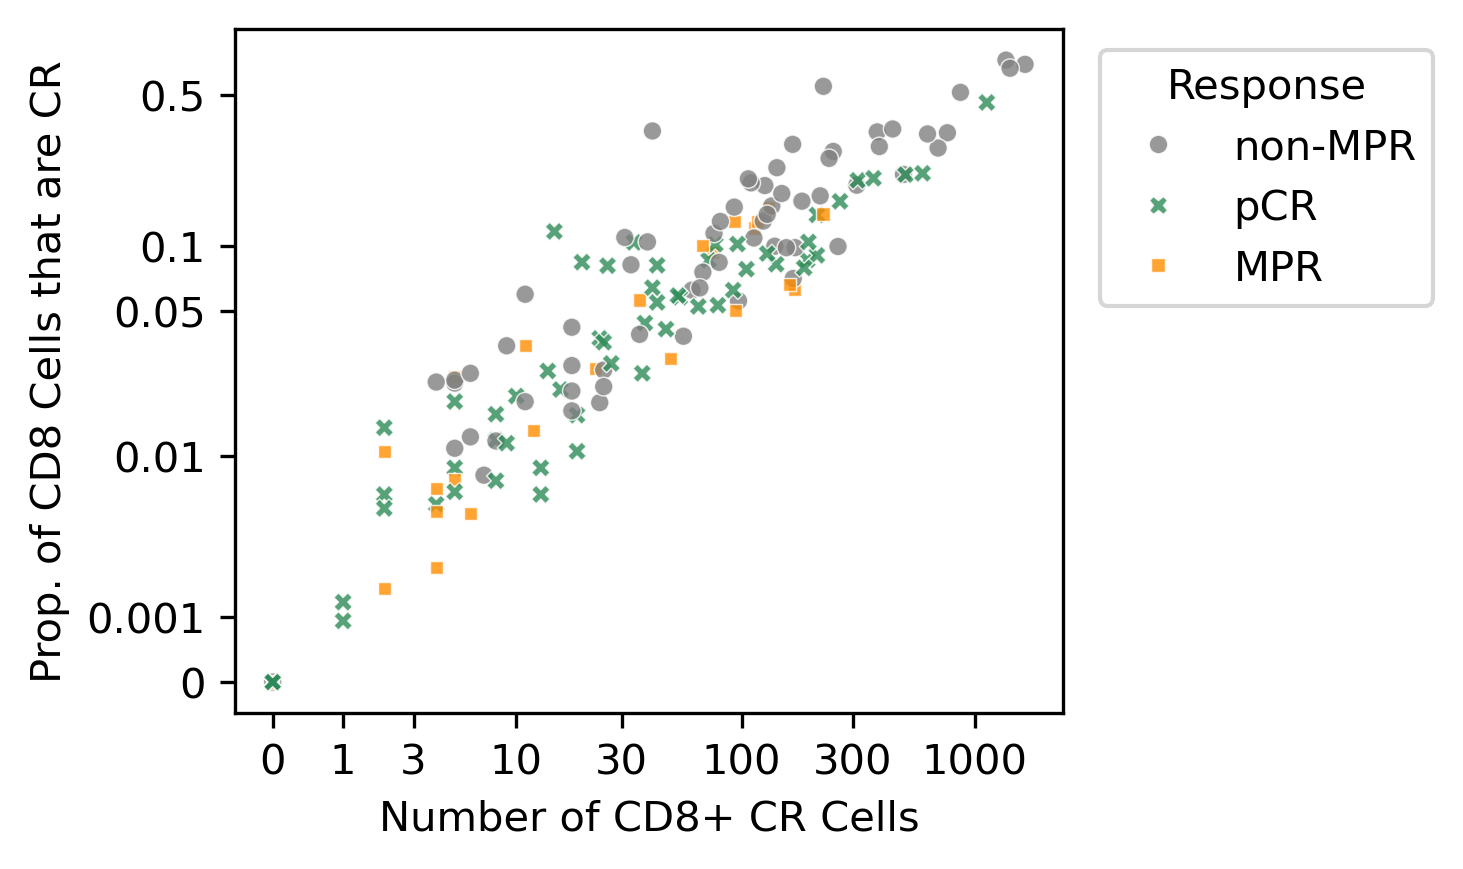

In [44]:

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.dpi'] = 300   # affects inline plots
plt.rcParams['savefig.dpi'] = 300  # affects saved plots

palette = {"pCR": "seagreen", "MPR": "darkorange", "non-MPR": "gray"}

df = df_CD8.reset_index().copy()
df.rename(columns={"Pathological Response": "Response"}, inplace=True)

# --- transforms ---
# x' = log10(1 + x) ; y' = log10(0.001 + y)
df["x_log"] = np.log10(1.0 + df["n_reactive"])
df["y_log"] = np.log10(0.001 + df["prop_reactive"])

# guard against bad values (NaN, -inf, inf)
mask = np.isfinite(df["x_log"]) & np.isfinite(df["y_log"])
dfp = df.loc[mask].copy()

plt.figure(figsize=(5, 3))
ax = sns.scatterplot(
    data=dfp,
    x="x_log",
    y="y_log",
    hue="Response",
    style="Response",
    s=20,
    palette=palette,
    alpha=0.8
)

y_ticks_orig = [0, 0.001, 0.01, 0.05, 0.1, 0.5]  # adjust to your data range
y_ticks_pos  = [np.log10(0.001 + v) for v in y_ticks_orig]
ax.set_yticks(y_ticks_pos)
ax.set_yticklabels([f"{v:g}" for v in y_ticks_orig])  # original-scale labels

# optional: do the same for x so labels show original counts
# pick some raw x values (counts) you like for ticks:
x_ticks_orig = [0, 1, 3, 10, 30, 100, 300, 1000]               # adjust as needed
x_ticks_pos  = [np.log10(1 + v) for v in x_ticks_orig]
ax.set_xticks(x_ticks_pos)
ax.set_xticklabels([f"{v:g}" for v in x_ticks_orig])

plt.xlabel("Number of CD8+ CR Cells")
plt.ylabel("Prop. of CD8 Cells that are CR")
plt.legend(title="Response", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [45]:
print(df.shape)
df = df.dropna(subset=["Response"])
print(df.shape)

df["Response"] = pd.Categorical(
    df["Response"], categories=["pCR", "MPR", "non-MPR"], ordered=True
)
resp_order = list(df["Response"].cat.categories)
resp_order

(231, 100)
(152, 100)


['pCR', 'MPR', 'non-MPR']

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_61556/335843491.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


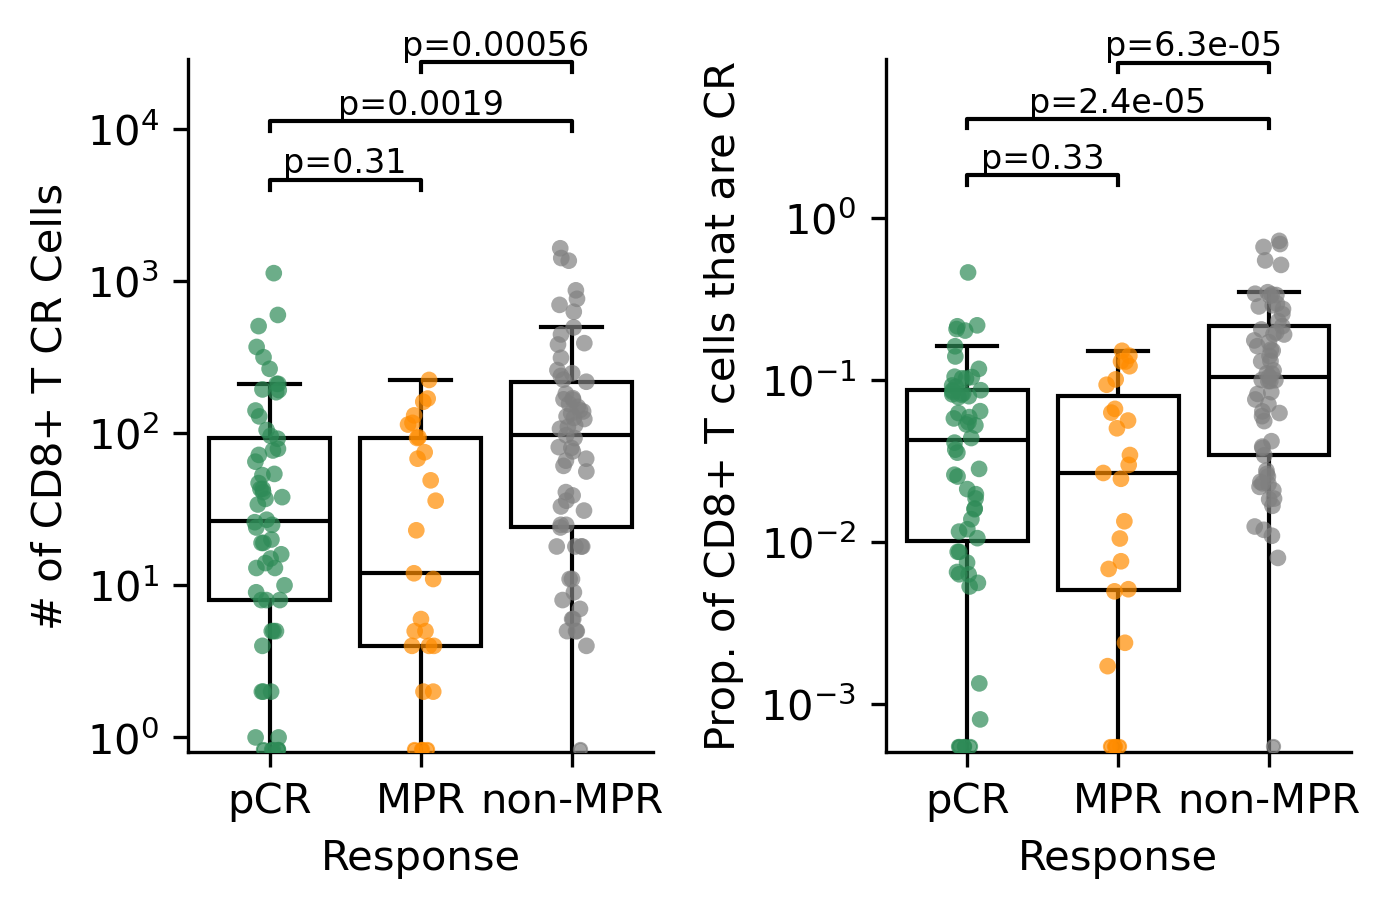

In [46]:
from scipy.stats import mannwhitneyu
import itertools
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu

def overlay_zero_points(ax, data, ycol, resp_order, palette, jitter=0.12):
    # category positions used by seaborn (0,1,2,...)
    xloc = {g:i for i,g in enumerate(resp_order)}
    # current bottom after you've set log scale and ylim
    y_bottom = ax.get_ylim()[0]
    y_zero = y_bottom * 1.05  # a hair above the bottom so they show

    for g in resp_order:
        z = data[(data["Response"]==g) & (data[ycol]==0)]
        if z.empty:
            continue
        # jitter around the category position
        x = xloc[g] + (np.random.rand(len(z)) - 0.5) * jitter
        ax.scatter(
            x, np.full(len(z), y_zero),
            s=10, color=palette[g], linewidth=0.5, alpha=0.7,
            zorder=3, label="_nolegend_"
        )


# custom palette
palette = {"pCR": "seagreen", "MPR": "darkorange", "non-MPR": "gray"}

plt.figure(figsize=(5, 3))
gs = plt.GridSpec(1, 2, wspace=0.5)

import itertools
import numpy as np
from scipy.stats import mannwhitneyu

def add_pvalues(ax, data, y, group_col="Response", order=None, pairs=None,
                include_zeros_in_test=True, draw_brackets=False,
                text_fmt="p={:.2g}", step_frac=0.12, line_height_frac=0.02):
    """
    Annotate pairwise Mann–Whitney p-values on a seaborn axis.

    Parameters
    ----------
    ax : matplotlib Axes
    data : DataFrame
    y : str
        Name of the y column.
    group_col : str
        Grouping column (e.g., 'Response').
    order : list[str]
        Category order on the x-axis (e.g., ['pCR','MPR','non-MPR']).
    pairs : list[tuple[str,str]] | None
        Specific pairs to test; default = all pairwise from `order`.
    include_zeros_in_test : bool
        If False, drop zeros from y before the test (useful for log axes).
    draw_brackets : bool
        If True, draw brackets; otherwise just place text.
    text_fmt : str
        Format for p-value text (default two significant digits).
    step_frac, line_height_frac : float
        Vertical spacing parameters (fraction of axis span in the working scale).
    """
    if order is None:
        order = list(data[group_col].dropna().unique())
    else:
        order = list(order)

    # x locations that seaborn uses for categories: 0,1,2,...
    xloc = {g: i for i, g in enumerate(order)}

    # Which pairs to compare?
    if pairs is None:
        pairs = list(itertools.combinations(order, 2))

    # Determine scale mode
    yscale = ax.get_yscale()  # 'linear', 'log', or 'symlog'

    # Values for positioning (don’t include NaNs)
    yvals = data[y].dropna()

    # For log/symlog placement, use positive values to compute top/bottom in log space
    if yscale in ("log", "symlog"):
        ypos = yvals[yvals > 0]
        if ypos.empty:
            return
        y_max = ypos.max()
        y_min_pos = ypos.min()
        # step in log space
        step = (np.log10(y_max) - np.log10(y_min_pos)) * max(step_frac, 1e-3)
        base_log = np.log10(y_max)
        bracket_h = line_height_frac * (np.log10(y_max) - np.log10(y_min_pos) + 1e-9)
        to_data = lambda z: 10**z
        ylim_bottom, ylim_top = ax.get_ylim()
    else:
        y_max = yvals.max()
        y_min = yvals.min()
        yrng = max(y_max - y_min, 1e-9)
        step = step_frac * yrng
        base = y_max
        bracket_h = line_height_frac * yrng
        to_data = lambda z: z
        ylim_bottom, ylim_top = ax.get_ylim()

    # Draw annotations
    top_needed = -np.inf
    for i, (g1, g2) in enumerate(pairs):
        v1 = data.loc[data[group_col] == g1, y].dropna()
        v2 = data.loc[data[group_col] == g2, y].dropna()
        if not include_zeros_in_test:
            v1 = v1[v1 != 0]
            v2 = v2[v2 != 0]
        if v1.empty or v2.empty:
            continue

        stat, p = mannwhitneyu(v1, v2, alternative="two-sided")

        # y position (above current top), respecting axis scale
        if yscale in ("log", "symlog"):
            y_data = to_data(base_log + (i + 1) * step)
            y_top_line = to_data(base_log + (i + 1) * step + bracket_h)
        else:
            y_data = base + (i + 1) * step
            y_top_line = y_data + bracket_h

        x1, x2 = xloc[g1], xloc[g2]
        xmid = (x1 + x2) / 2.0

        # optional bracket
        if draw_brackets:
            ax.plot([x1, x1, x2, x2],
                    [y_data, y_top_line, y_top_line, y_data],
                    lw=1.0, c="black", clip_on=False)

            ax.text(xmid, y_top_line, text_fmt.format(p),
                    ha="center", va="bottom", fontsize=8)
            top_needed = max(top_needed, y_top_line)
        else:
            ax.text(xmid, y_data, text_fmt.format(p),
                    ha="center", va="bottom", fontsize=8)
            top_needed = max(top_needed, y_data)

    # Extend ylim to fit annotations
    if top_needed != -np.inf:
        ax.set_ylim(ylim_bottom, max(ylim_top, top_needed * (1.05 if yscale in ("log","symlog") else 1.02)))



# --- (A) counts vs Response (log10 y-axis) ---
ax1 = plt.subplot(gs[0, 0])
sns.boxplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, showfliers=False,
    hue="Response", palette=["white"] * len(resp_order),
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    legend=False, ax=ax1
)
sns.stripplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, dodge=False, alpha=0.7, size=4,
    hue="Response", palette=palette, legend=False, ax=ax1
)
if ax1.legend_ is not None:
    ax1.legend_.remove()

# log scale on y; ensure positive lower bound
ax1.set_yscale("symlog", base=10, linthresh=0.5)   # 0–0.5 linear, >0.5 log
pos_counts = df.loc[df["n_reactive"] > 0, "n_reactive"]
if not pos_counts.empty:
    ax1.set_ylim(bottom=pos_counts.min() * 0.8)

ax1.set_xlabel("Response")
ax1.set_ylabel("# of CD8+ T CR Cells")
sns.despine(ax=ax1)

add_pvalues(ax1, df, "n_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")

overlay_zero_points(ax1, df, "n_reactive", resp_order, palette)

# --- (B) proportion vs Response (log10 y-axis) ---
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, showfliers=False,
    hue="Response", palette=["white"] * len(resp_order),
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    legend=False, ax=ax2
)
sns.stripplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, dodge=False, alpha=0.7, size=4,
    hue="Response", palette=palette, legend=False, ax=ax2
)
if ax2.legend_ is not None:
    ax2.legend_.remove()

ax2.set_yscale("symlog", base=10, linthresh=1e-3)  # 0–0.001 linear, >0.001 log
pos_prop = df.loc[df["prop_reactive"] > 0, "prop_reactive"]
if not pos_prop.empty:
    ax2.set_ylim(bottom=pos_prop.min() * 0.8)

ax2.set_xlabel("Response")
ax2.set_ylabel("Prop. of CD8+ T cells that are CR")
sns.despine(ax=ax2)

add_pvalues(ax2, df, "prop_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")

overlay_zero_points(ax2, df, "n_reactive", resp_order, palette)

plt.tight_layout()
plt.show()



In [47]:
print(df.shape)
print(df.iloc[0:5, :])


(152, 100)
   index Patient  prop_reactive  n_reactive  n_total Pre-treatment TNM  \
0      0      P1       0.192025         313     1630              T2N1   
2      2    P102       0.462485        1128     2439             T2aN2   
3      3    P103       0.215278         496     2304           cT4N2M0   
4      4    P105       0.100072         139     1389          cT1bN2M0   
5      5    P106       0.296429         166      560           cT4N1M0   

  Pre-treatment Staging Surgery TNM   PD-L1 TPS Response  PRR*0.1  \
0                   IIB       T1cN2  Not tested  non-MPR      7.0   
2                  IIIA        T0N0  Not tested      pCR     10.0   
3                  IIIB    ypT4N2M0         <1%  non-MPR      5.0   
4                  IIIA      pT1aN0  Not tested  non-MPR      7.5   
5                  IIIA      pT2bN0        0.01  non-MPR      3.0   

   RFS_status_new  RFS_months_new         recurrence_site adjuvant_therapy  \
0             1.0           14.50  mediastinal lymp

In [48]:
df_S1 = pd.read_csv('Table_S1.csv')
df_S1 = df_S1.rename(columns={"Tumor_Sample_Barcode": "Patient"})
df_S1


,Patient,Gender,Age,issmoke,pathology,response,Platinum,Pathological Response Rate,Cycles,Pre-treatment TNM,center,PD1,Chemotherapy,PD-L1TPS,response_rate,Pathological Response,Pre-treatment Staging,grouped_staging,Driver Mutations,Mutation Details
0,P1,M,62.0,N,LUSC,pPR,not available,0.70,3.0,T2N1,Peking,Camrelizumab,not available,NaN,0.70,non-MPR,IIB,IA-IIB,NaN,NaN
1,P10,M,50.0,N,LUAD,pPR,not available,0.75,2.0,T1cN2,Peking,Camrelizumab,not available,NaN,0.75,non-MPR,IIIA,IIIA-IIIB,KRAS,KRAS G12V
2,P102,M,74.0,Y,LUSC,pCR,Carboplatin,1.00,4.0,T2aN2,Peking,Pembrolizumab,Carboplatin + Abraxane,NaN,1.00,pCR,IIIA,IIIA-IIIB,NaN,NaN
3,P103,M,67.0,Y,LUSC,pPR,Carboplatin,0.50,3.0,cT4N2M0,Guangdong,Nivolumab,Carboplatin + Paclitaxel,NaN,0.50,non-MPR,IIIB,IIIA-IIIB,NaN,NaN
4,P105,M,65.0,Y,LUAD,pPR,Carboplatin,0.75,3.0,cT1bN2M0,Shanghai,Pembrolizumab,Carboplatin + Pemetrexed,NaN,0.75,non-MPR,IIIA,IIIA-IIIB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,P92,M,53.0,Y,LUSC,pCR,Carboplatin,1.00,2.0,cT3N1M0,Other,Tislelizumab(C2),Carboplatin + Abraxane,NaN,1.00,pCR,IIIA,IIIA-IIIB,NaN,NaN
360,P93,M,74.0,Y,LUSC,pCR,Carboplatin,1.00,2.0,cT4N2M0,Shanghai,Sintilimab,Carboplatin + Gemcitabine,0.01,1.00,pCR,IIIB,IIIA-IIIB,NaN,NaN
361,P94,M,74.0,Y,LUSC,NaN,Paclitaxel Liposome,NaN,2.0,T2bN2,Peking,Tislelizumab,Paclitaxel Liposome,NaN,NaN,non-MPR,IIIA,IIIA-IIIB,NaN,NaN
362,P96,M,67.0,Y,LUAD,pPR,Carboplatin,0.85,3.0,T3N2M0,Shanghai,Sintilimab,Carboplatin + Pemetrexed,0.00,0.85,non-MPR,IIIB,IIIA-IIIB,KRAS,KRAS G12C


In [49]:
df['response_S1'] = df['Patient'].map(df_S1.set_index('Patient')['response'])
df['Pathological Response Rate'] = df['Patient'].map(df_S1.set_index('Patient')['Pathological Response Rate']) 
df['grouped_staging'] = df['Patient'].map(df_S1.set_index('Patient')['grouped_staging']) 
df['Age'] = df['Patient'].map(df_S1.set_index('Patient')['Age']) 
df['Gender'] = df['Patient'].map(df_S1.set_index('Patient')['Gender']) 

pd.crosstab(df['response_S1'], df['Response'])


Response,pCR,MPR,non-MPR
response_S1,,,
MPR,0,20,0
nPR,0,0,27
pCR,60,5,0
pPR,0,0,28


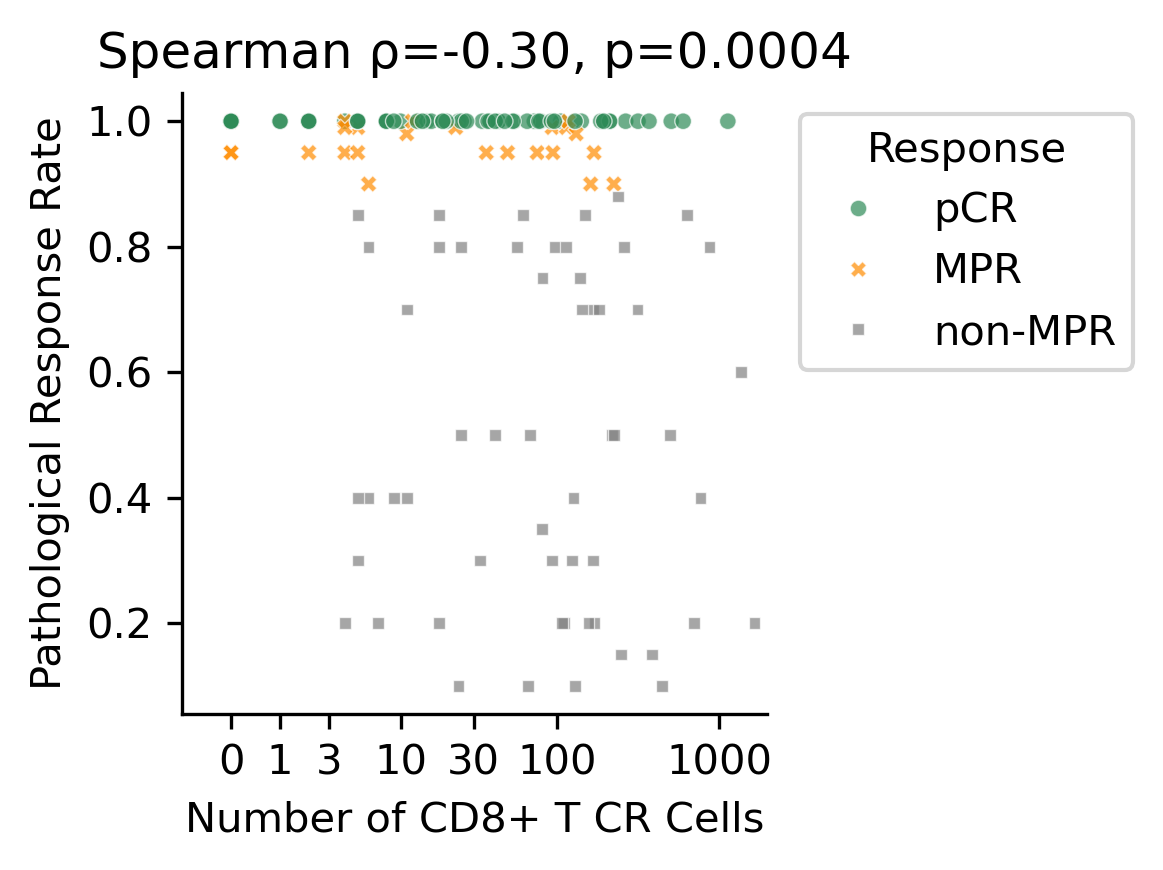

In [50]:

from scipy.stats import spearmanr

palette = {"pCR": "seagreen", "MPR": "darkorange", "non-MPR": "gray"}

# include x >= 0 (zeros allowed) and finite y
mask = (df["n_reactive"] >= 0) & np.isfinite(df["Pathological Response Rate"]) & np.isfinite(df["n_reactive"])
dfp = df.loc[mask].copy()

rho, p = spearmanr(dfp["n_reactive"], dfp["Pathological Response Rate"])

fig, ax = plt.subplots(figsize=(4, 3))
sns.scatterplot(
    data=dfp, x="n_reactive", y="Pathological Response Rate",
    hue="Response", style="Response", palette=palette,
    s=16, alpha=0.7, ax=ax
)

# log10(1 + x) axis transform (works with zeros)
ax.set_xscale("function",
              functions=(lambda x: np.log10(1 + x),
                         lambda x: 10**x - 1))
ax.set_xlim(left=-0.5, right=dfp["n_reactive"].max()*1.2)  # show x=0

# nice ticks in original units
ticks = np.array([0, 1, 3, 10, 30, 100, 1000])
ax.set_xticks(ticks)

sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.legend(title="Response", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set_xlabel("Number of CD8+ T CR Cells")
ax.set_ylabel("Pathological Response Rate")
ax.set_title(f"Spearman ρ={rho:.2f}, p={p:.2g}")
plt.tight_layout()
plt.show()



[KM] n_reactive: cut=43, log-rank p=0.284
                       coef  exp(coef)         p  coef lower 95%  \
covariate                                                          
n_reactive_scaled  0.064022   1.066116  0.227816       -0.040025   

                   coef upper 95%  
covariate                          
n_reactive_scaled        0.168069  

PH test (p<0.05 suggests violation):
                   test_statistic         p  -log2(p)
n_reactive_scaled        2.121219  0.145271  2.783182


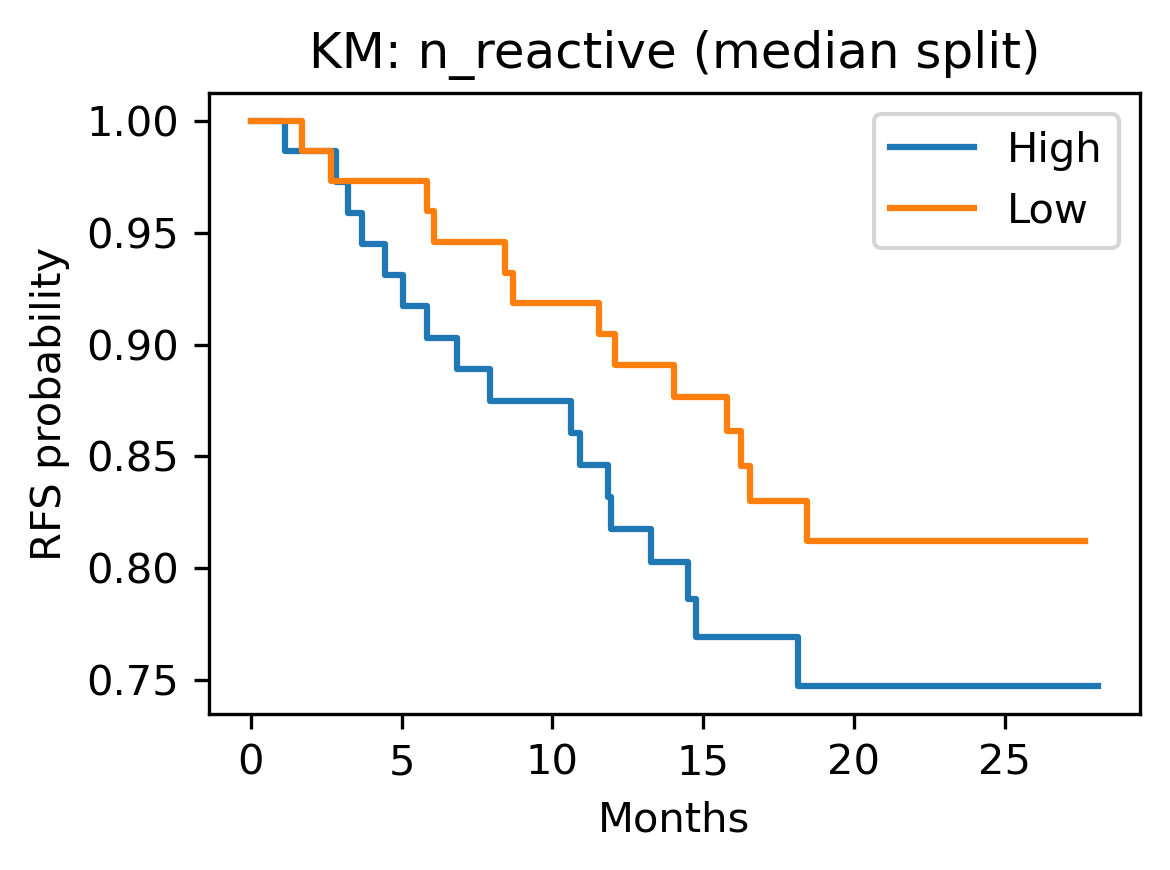

In [51]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, proportional_hazard_test
import matplotlib.pyplot as plt

# ---------- Helpers ----------
def km_by_median(df, x, 
                 time='RFS_months_new', event='RFS_status_new', 
                 label_hi='High', label_lo='Low'):
    d = df[[time, event, x]].dropna()
    cut = d[x].median()
    d['group'] = np.where(d[x] > cut, label_hi, label_lo)

    # KM curves
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(4,3))
    for g, gdf in d.groupby('group'):
        kmf.fit(gdf[time], gdf[event], label=g)
        kmf.plot(ci_show=False)
    plt.xlabel('Months'); plt.ylabel('RFS probability'); plt.title(f'KM: {x} (median split)')
    plt.tight_layout()

    # Log-rank test
    A = d[d['group']==label_hi]
    B = d[d['group']==label_lo]
    lr = logrank_test(A[time], B[time], event_observed_A=A[event], event_observed_B=B[event])
    print(f"[KM] {x}: cut={cut:.4g}, log-rank p={lr.p_value:.3g}")

def cox_continuous(df, x, scale=1.0, time='RFS_months_new', event='RFS_status_new'):
    import numpy as np
    from lifelines import CoxPHFitter
    from lifelines.statistics import proportional_hazard_test

    # build clean dataset
    d = df[[time, event, x]].rename(columns={time:'time', event:'event'}).copy()
    d = d.replace([np.inf, -np.inf], np.nan).dropna()
    d[f'{x}_scaled'] = d[x] / scale

    cols_fit = ['time', 'event', f'{x}_scaled']  # <- only the covariate you fit with

    cph = CoxPHFitter()
    cph.fit(d[cols_fit], duration_col='time', event_col='event')

    print(cph.summary[['coef','exp(coef)','p','coef lower 95%','coef upper 95%']])

    # PH test: use the same columns as fit
    ph = proportional_hazard_test(cph, d[cols_fit], time_transform='rank')
    print("\nPH test (p<0.05 suggests violation):")
    print(ph.summary)

    return cph

# ---------- 1) RFS vs n_reactive ----------
# KM (median split)
km_by_median(df, 'n_reactive')

# Cox (continuous): interpret HR per +100 cells
cph_n = cox_continuous(df, 'n_reactive', scale=100.0)



[KM] prop_reactive: cut=0.06114, log-rank p=0.0646
                          coef  exp(coef)         p  coef lower 95%  \
covariate                                                             
prop_reactive_scaled  0.174944    1.19118  0.086086       -0.024824   

                      coef upper 95%  
covariate                             
prop_reactive_scaled        0.374712  

PH test (p<0.05 suggests violation):
                      test_statistic         p  -log2(p)
prop_reactive_scaled         2.25761  0.132959  2.910945


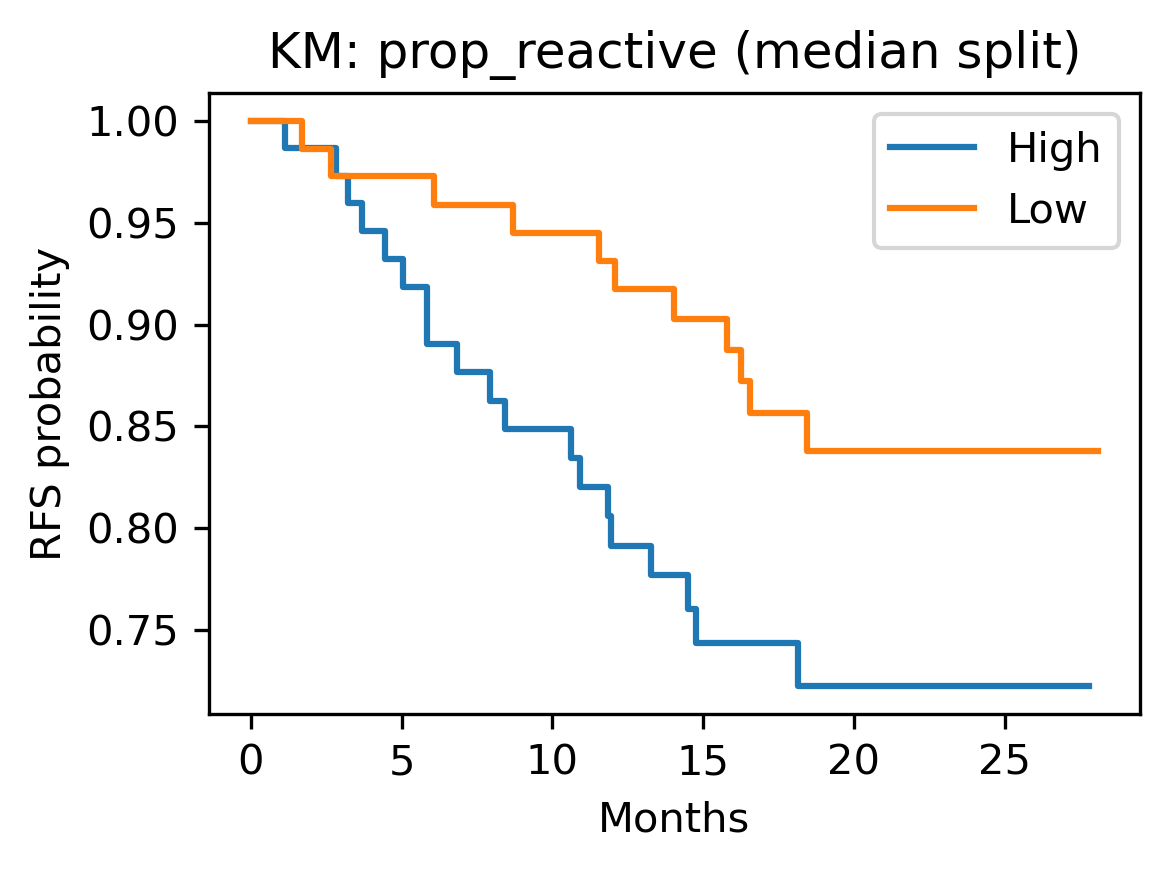

In [52]:
# ---------- 2) RFS vs prop_reactive ----------
# KM (median split)
km_by_median(df, 'prop_reactive')

# Cox (continuous): interpret HR per +0.10 absolute increase in proportion
cph_p = cox_continuous(df, 'prop_reactive', scale=0.10)



[KM] n_reactive: low≤18, high≥106.3 | n_top=51, n_bottom=54 | log-rank p=0.271
[KM] prop_reactive: low≤0.02531, high≥0.1006 | n_top=51, n_bottom=51 | log-rank p=0.0274


{'cut_low': 0.025310683590480644,
 'cut_high': 0.10061746989024259,
 'n_top': 51,
 'n_bottom': 51}

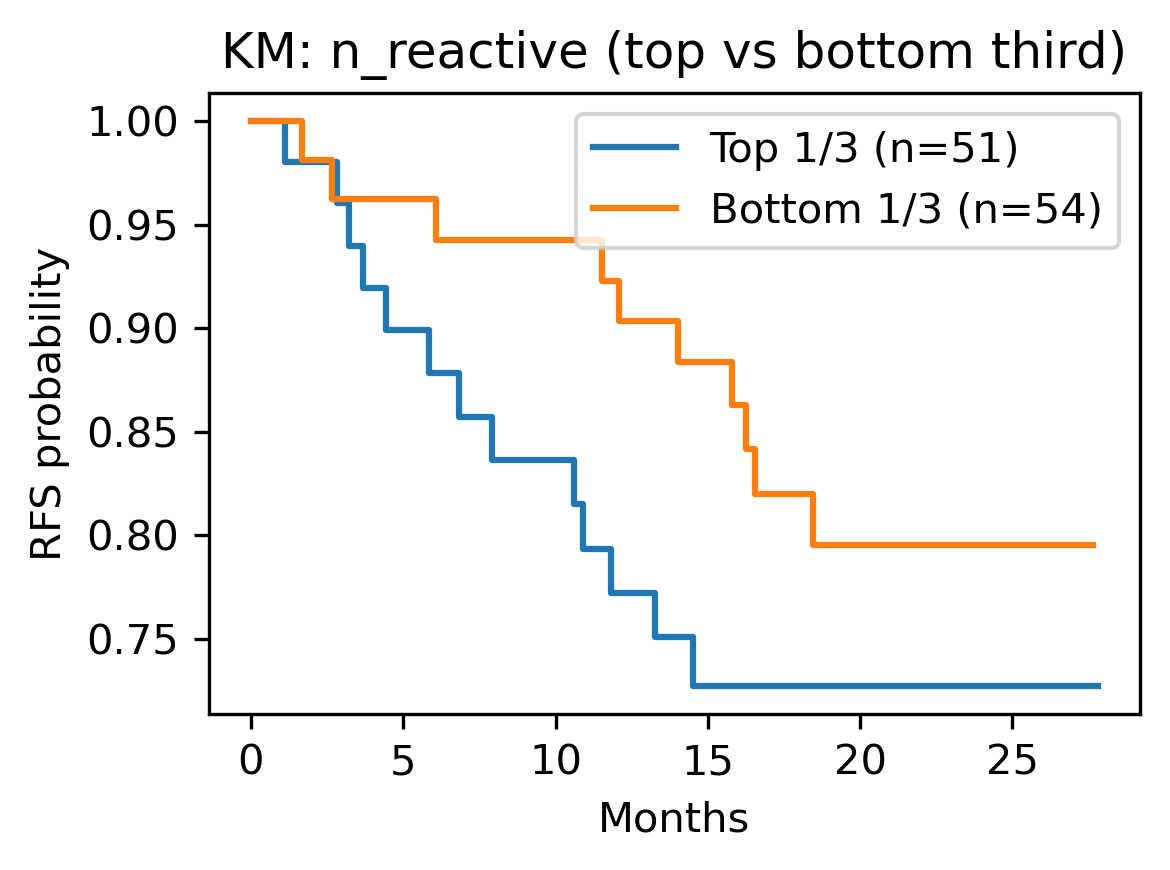

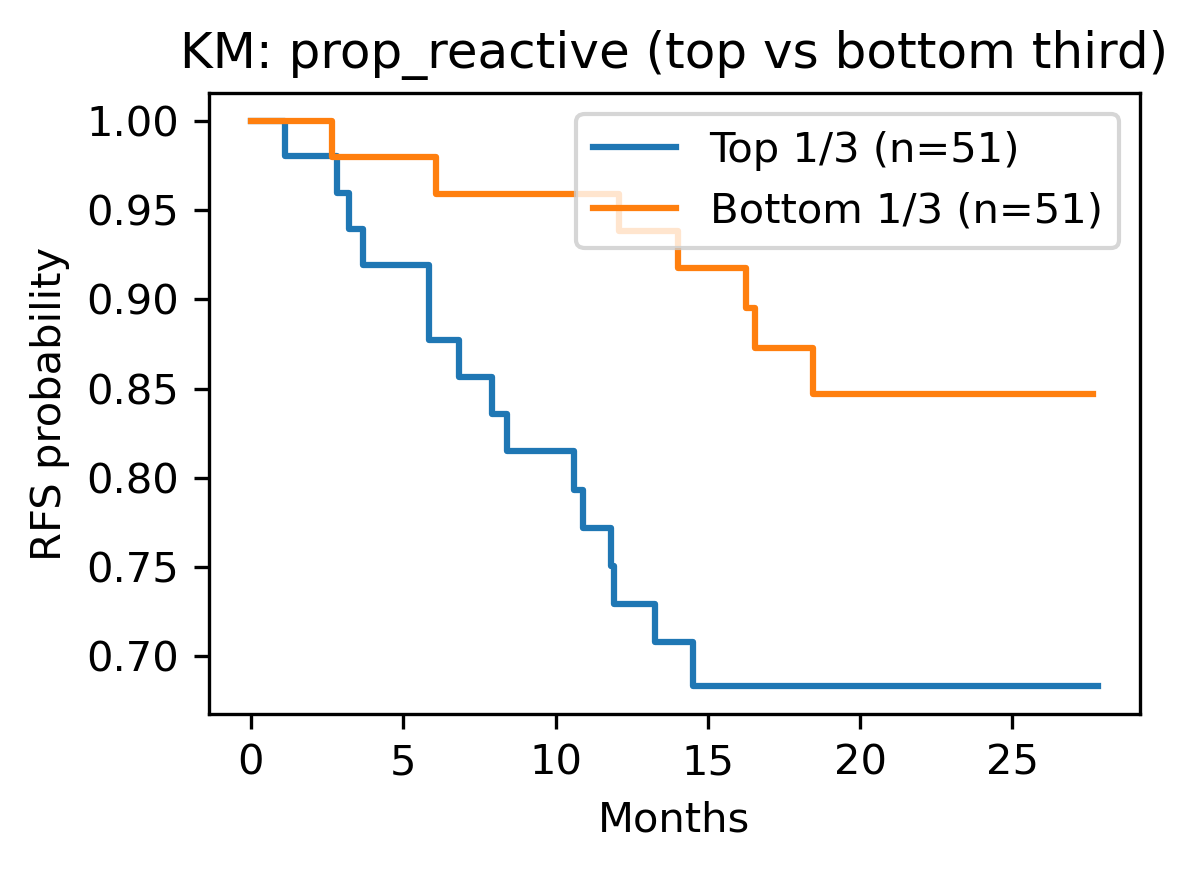

In [53]:

def km_top_vs_bottom_third(df, x,
                           time='RFS_months_new', event='RFS_status_new',
                           label_hi='Top 1/3', label_lo='Bottom 1/3',
                           q_low=1/3, q_high=2/3):
    # clean
    d = df[[time, event, x]].replace([np.inf, -np.inf], np.nan).dropna()

    # tercile cutpoints
    lo, hi = d[x].quantile([q_low, q_high])

    # assign groups: top third vs bottom third; drop middle
    d['group'] = np.where(d[x] >= hi, label_hi,
                   np.where(d[x] <= lo, label_lo, np.nan))
    d2 = d.dropna(subset=['group'])

    # KM curves
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(4,3))
    for lab, gdf in [(label_hi, d2[d2['group']==label_hi]),
                     (label_lo, d2[d2['group']==label_lo])]:
        if gdf.empty: 
            continue
        kmf.fit(gdf[time], gdf[event], label=f"{lab} (n={len(gdf)})")
        kmf.plot(ci_show=False)

    plt.xlabel('Months')
    plt.ylabel('RFS probability')
    plt.title(f'KM: {x} (top vs bottom third)')
    plt.tight_layout()

    # Log-rank test (only top vs bottom)
    A = d2[d2['group']==label_hi]
    B = d2[d2['group']==label_lo]
    if len(A) > 0 and len(B) > 0:
        lr = logrank_test(A[time], B[time], event_observed_A=A[event], event_observed_B=B[event])
        print(f"[KM] {x}: low≤{lo:.4g}, high≥{hi:.4g} | n_top={len(A)}, n_bottom={len(B)} | log-rank p={lr.p_value:.3g}")
    else:
        print(f"[KM] {x}: insufficient data after tercile split (top n={len(A)}, bottom n={len(B)})")

    return {'cut_low': lo, 'cut_high': hi, 'n_top': len(A), 'n_bottom': len(B)}



km_top_vs_bottom_third(df, 'n_reactive')
km_top_vs_bottom_third(df, 'prop_reactive')


In [54]:
# df = df.loc[df["stage_group"].ne("I").fillna(True)]
pd.crosstab(df["grouped_staging"], df["Pre-treatment Staging"])

Pre-treatment Staging,IA2,IB,IIA,IIB,III,IIIA,IIIB
grouped_staging,,,,,,,
IA-IIB,1,3,9,24,0,0,0
IIIA-IIIB,0,0,0,0,1,81,32


In [55]:
print(df.Response.value_counts(dropna=False))
df

Response
non-MPR    65
pCR        60
MPR        27
Name: count, dtype: int64


,index,Patient,prop_reactive,n_reactive,n_total,Pre-treatment TNM,Pre-treatment Staging,Surgery TNM,PD-L1 TPS,Response,PRR*0.1,RFS_status_new,RFS_months_new,recurrence_site,adjuvant_therapy,adjuvant_chemo1,adjuvant_chemo2,adjuvant_immune,targeted,adjuvant_cycles,adjuvant_immune_cycles,notes,pCR,MPR,histology,PRR_group,B_prf_MKI67,Bm_CD74,Bm_FCRL4,Bm_MT2A,Bm_PDE4D,Bm_TNF,Bm_TNFSF9,Bn_TCL1A,CD4T_Tem_GZMA,CD4T_Tfh_CXCL13,CD4T_Th1_like_CXCL13,CD4T_Tm_ANXA1,CD4T_Tm_XCL1,CD4T_Tn_CCR7,CD4T_Treg_CCR8,CD4T_Treg_FOXP3,CD4T_Treg_MKI67,CD8T_ISG15,CD8T_MAIT_KLRB1,CD8T_NK_like_FGFBP2,CD8T_prf_MKI67,CD8T_Tem_GZMK_GZMH,CD8T_Tem_GZMK_NR4A1,CD8T_terminal_Tex_LAYN,CD8T_Tex_CXCL13,CD8T_Tm_IL7R,CD8T_Trm_ZNF683,cDC1_CLEC9A,cDC2_CD1C,GCB_RGS13,ILC3_KIT,Mast_cell,mDC_LAMP3,Mφ_CXCL10,Mφ_CXCL2,Mφ_DNAJB1,Mφ_FCGR3A,Mφ_FOLR2,Mφ_ISG15,Mφ_MARCO,Mφ_MKI67,Mφ_MMP9,Mφ_S100A10,Mφ_VCAN,Neu_FCGR3B,NK_CD16hi_FGFBP2,NK_CD16low_GZMK,pDC_LILRA4,Plasma_cell,T_gdT_TRDV1,T_gdT_TRDV2,Treg_CCR8*10,Treg_FOXP3,Treg_MKI67,new_group,numberTexClone*0.1,numberTregClone*0.1,Texp.in.Tex.relevant*10,number.of.cells.top.3.tex.clones,number.of.cells.top.3.treg.clones,module1,module2,module3,module4,module5,module1.bin,module2.bin,module3.bin,module4.bin,module5.bin,moduleNK.bin,TCR.classification,x_log,y_log,response_S1,Pathological Response Rate,grouped_staging,Age,Gender
0,0,P1,0.192025,313,1630,T2N1,IIB,T1cN2,Not tested,non-MPR,7.0,1.0,14.50,mediastinal lymph node,yes,no,no,PD1,no,NaN,12,NaN,non-pCR,non-MPR,LUSC,pPR,0.001281,0.013978,0.002213,0.001165,0.031334,0.010250,0.038090,0.010716,0.058824,0.055213,0.033197,0.108678,0.005009,0.116948,0.047175,0.077344,0.003262,0.007921,0.019220,0.010017,0.011415,0.049156,0.062318,0.023529,0.034712,0.077577,0.019802,0.000000,0.000000,0.000233,0.004543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008736,0.030518,0.000000,0.004543,0.011299,0.009785,3.691887,0.605287,0.025524,4.0,2.4,4.5,6.376404,100.0,22.0,0.127432,0.111124,0.228072,0.260571,0.000000,high,low,high,high,low,low,type I,2.496930,-0.714387,pPR,0.70,IA-IIB,62.0,M
2,2,P102,0.462485,1128,2439,T2aN2,IIIA,T0N0,Not tested,pCR,10.0,0.0,24.21,NaN,no,no,no,no,no,0,0,NaN,pCR,MPR,LUSC,pCR,0.000248,0.003098,0.000372,0.000496,0.006691,0.003345,0.006815,0.003965,0.018585,0.006319,0.012018,0.021063,0.004213,0.028125,0.016603,0.033701,0.003221,0.004337,0.008673,0.050675,0.036922,0.048693,0.022054,0.041878,0.120183,0.045595,0.044356,0.002230,0.021187,0.000496,0.003098,0.021187,0.003098,0.009169,0.013381,0.008425,0.030727,0.006319,0.002106,0.017346,0.003345,0.000248,0.003593,0.040020,0.004337,0.173461,0.023417,0.001982,0.001487,0.011275,0.005823,3.101852,0.629630,0.060185,1.0,5.1,0.9,8.250497,531.0,140.0,0.275926,0.027382,0.169372,0.263164,0.125511,high,low,low,high,high,high,MPR,3.052694,-0.333965,pCR,1.00,IIIA-IIIB,74.0,M
3,3,P103,0.215278,496,2304,cT4N2M0,IIIB,ypT4N2M0,<1%,non-MPR,5.0,1.0,5.85,lung,yes,no,no,PD1,no,6,6,recurred during adjuvant ICI,non-pCR,non-MPR,LUSC,pPR,0.000639,0.019568,0.003837,0.000767,0.034020,0.031973,0.063691,0.012789,0.037601,0.031078,0.030694,0.076992,0.010615,0.071365,0.022637,0.048600,0.002814,0.019696,0.006650,0.011127,0.018545,0.048855,0.070469,0.014196,0.054611,0.081468,0.052181,0.000767,0.009208,0.000639,0.003197,0.006523,0.000895,0.007546,0.002302,0.002814,0.001407,0.002558,0.001918,0.003581,0.001535,0.000128,0.000128,0.003325,0.000128,0.010999,0.015859,0.002430,0.012150,0.025707,0.006778,3.056995,0.656304,0.037997,3.0,2.8,2.1,8.946048,278.0,23.0,0.100524,0.169075,0.259624,0.212175,0.037473,high,high,high,high,low,high,type I,2.696356,-0.664988,pPR,0.50,IIIA-IIIB,67.0,M
4,4,P105,0.100072,139,1389,cT1bN2M0,IIIA,pT1aN0,Not tested,non-MPR,7.5,0.0,17.58,NaN,yes,carboplatin,pemetrexed,pembrolizumab,no,1,1,NaN,non-pCR,non-MPR,LUAD,pPR,0.001682,0.028296,0.007648,0.000918,0.074794,0.037932,0.077700,0.007495,0.027225,0.064393,0.024625,0.066534,0.008259,0.067299,0.015601,0.069899,0.001071,0.

In [56]:
# --- columns ---
time_col  = "RFS_months_new"
event_col = "RFS_status_new"   # 1=event, 0=censored

# Working copy & cleaning
d = (df[[time_col, event_col, "Age", "Response", "grouped_staging", 
         "Gender", "prop_reactive", "Pathological Response Rate"]]
       .replace([np.inf, -np.inf], np.nan)
       .dropna()
       .copy())

# Prepare time/event
d = d.rename(columns={time_col: "time", event_col: "event"})
d["time"]  = d["time"].astype(float)
d["event"] = d["event"].astype(int)

# Scale for interpretability
d["age10"]   = d["Age"] / 10.0              # HR per +10 years
d["prop10"]  = d["prop_reactive"] / 0.10    # HR per +0.10 absolute increase

# Set baselines (first level is baseline when drop_first=True)
d["Response"]        = pd.Categorical(d["Response"],        categories=["pCR", "MPR", "non-MPR"], ordered=True)
d["grouped_staging"] = pd.Categorical(d["grouped_staging"], categories=["IA-IIB", "IIIA-IIIB"], ordered=True)
d["Gender"]          = pd.Categorical(d["Gender"],          categories=["M", "F"], ordered=True)

d

,time,event,Age,Response,grouped_staging,Gender,prop_reactive,Pathological Response Rate,age10,prop10
0,14.50,1,62.0,non-MPR,IA-IIB,M,0.192025,0.70,6.2,1.920245
2,24.21,0,74.0,pCR,IIIA-IIIB,M,0.462485,1.00,7.4,4.624846
3,5.85,1,67.0,non-MPR,IIIA-IIIB,M,0.215278,0.50,6.7,2.152778
4,17.58,0,65.0,non-MPR,IIIA-IIIB,M,0.100072,0.75,6.5,1.000720
5,26.58,0,57.0,non-MPR,IIIA-IIIB,M,0.296429,0.30,5.7,2.964286
...,...,...,...,...,...,...,...,...,...,...
225,24.77,0,66.0,pCR,IIIA-IIIB,M,0.005291,1.00,6.6,0.052910
226,1.84,0,64.0,pCR,IA-IIB,M,0.206607,1.00,6.4,2.066069
227,26.28,0,67.0,non-MPR,IIIA-IIIB,M,0.021853,0.50,6.7,0.218531
228,27.20,0,53.0,pCR,IIIA-IIIB,M,0.028213,1.00,5.3,0.282132


In [57]:
# One-hot encode categoricals (baselines: pCR, stage=2, Male)
X = pd.get_dummies(d[["Gender", "Response"]], drop_first=True)
X = pd.get_dummies(d[["Gender"]], drop_first=True)

print(X.shape)
print(X.head())

# Design matrix
dd = pd.concat([d[["time", "event", "age10", "prop10",  "Pathological Response Rate"]], X], axis=1)
dd = dd.rename(columns={"Pathological Response Rate": "response_rate"})

dd


(140, 1)
   Gender_F
0     False
2     False
3     False
4     False
5     False


,time,event,age10,prop10,response_rate,Gender_F
0,14.50,1,6.2,1.920245,0.70,False
2,24.21,0,7.4,4.624846,1.00,False
3,5.85,1,6.7,2.152778,0.50,False
4,17.58,0,6.5,1.000720,0.75,False
5,26.58,0,5.7,2.964286,0.30,False
...,...,...,...,...,...,...
225,24.77,0,6.6,0.052910,1.00,False
226,1.84,0,6.4,2.066069,1.00,False
227,26.28,0,6.7,0.218531,0.50,False
228,27.20,0,5.3,0.282132,1.00,False


In [58]:
pd.crosstab(d["Response"], d["grouped_staging"])

grouped_staging,IA-IIB,IIIA-IIIB
Response,,
pCR,22,38
MPR,6,19
non-MPR,8,47


## Fit a joint model with proportion of cancer reactive given pathological response rate. 

Higher proportion of cancer reactive T cells should be associated with better survival. It is not the case in marginal regression, because CRT proportion is strongly associated with Pathological Response Rate. Given the Pathological Response Rate, we do see higher proporiton is associated with better survival time, though not significant here. 

In [59]:
# Fit Cox PH
cph = CoxPHFitter()
cph.fit(dd, duration_col="time", event_col="event")
cph.print_summary()  # coef, HR=exp(coef), CI, p

<lifelines.CoxPHFitter: fitted with 140 total observations, 113 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 140
number of events observed = 27
   partial log-likelihood = -119.73
         time fit was run = 2025-08-17 03:54:52 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
age10          0.07      1.08      0.28           -0.48            0.63                0.62                1.88
prop10        -0.11      0.90      0.14           -0.39            0.17                0.68                1.19
response_rate -2.52      0.08      0.61           -3.71           -1.33                0.02                0.27
Gender_F      -1.32      0.27      0.79           -2.86            0.23                0.06                1.25

               cmp to     z      p  -log2(p)
covariate                                   
age10            0.00  0.26   0.79      0.34
prop10           0.00 -0.77   0.44      1.17
response_rate    0.00 -4.14 <0.005     14.84
Gender_F         0.00 -1.67   0.09      3.40
---
Concordance = 0.73
Partial AIC = 247.47
log-likelihood ratio test = 15.52 on 4 df
-log2(p) of ll-ratio test = 8.07

In [60]:
# PH assumption check
ph = proportional_hazard_test(cph, dd, time_transform="rank")
print("\nPH test (p<0.05 suggests violation):")
print(ph.summary)



PH test (p<0.05 suggests violation):
               test_statistic         p  -log2(p)
Gender_F             0.006164  0.937423  0.093228
age10                0.936209  0.333255  1.585303
prop10               0.059260  0.807670  0.308162
response_rate        1.504673  0.219954  2.184728


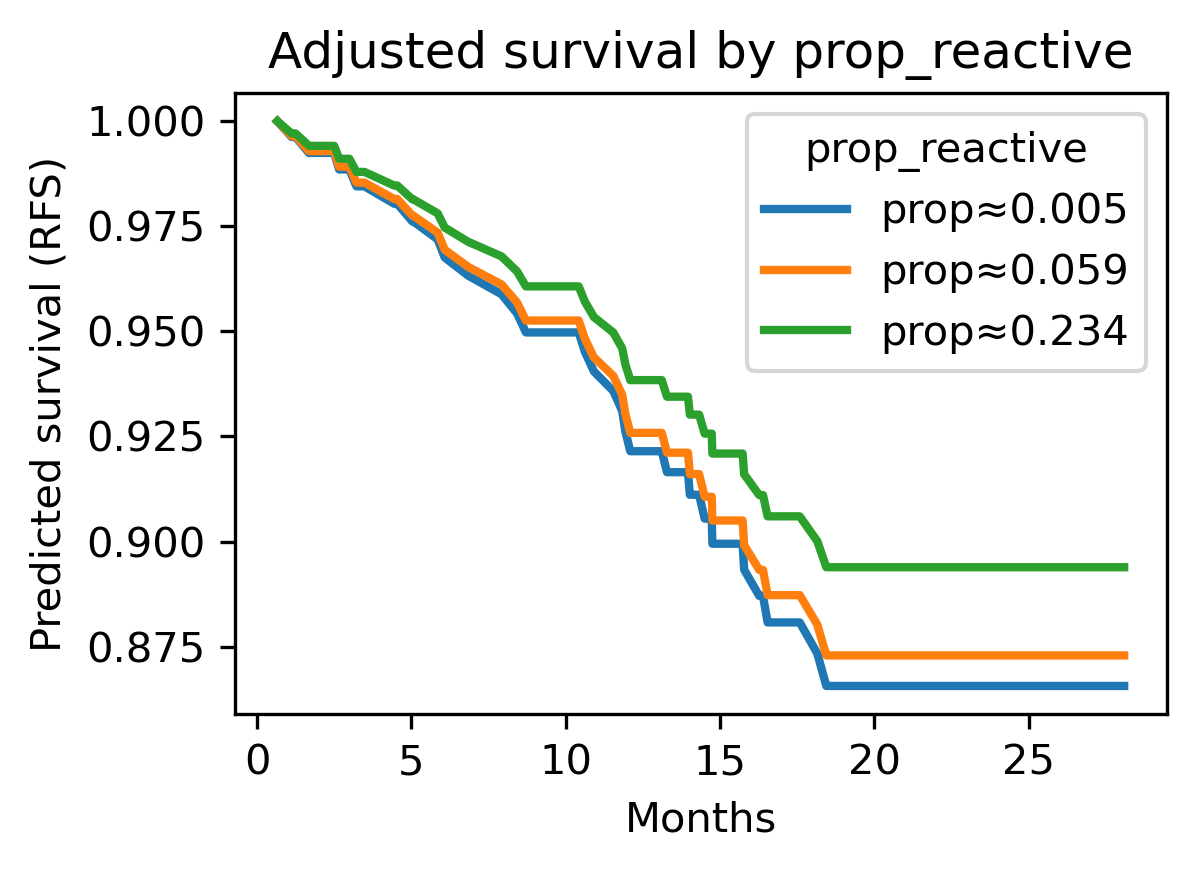

In [61]:
baseline = dd.drop(columns=["time","event"]).mean()
baseline["response_rate"] = dd["response_rate"].median()
prop_vals = dd["prop10"].quantile([0.1, 0.5, 0.9]).values

# figure size here
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))  # width, height (inches)

# build rows to predict
rows, labels = [], []
for v in prop_vals:
    r = baseline.copy(); r["prop10"] = v
    rows.append(r); labels.append(f"prop≈{v*0.10:.3f}")

# plot on the same Axes
sf_all = cph.predict_survival_function(pd.DataFrame(rows))
sf_all.columns = labels
sf_all.plot(ax=ax, lw=2)   # <-- use the sized axes

ax.legend(title="prop_reactive")
ax.set_xlabel("Months")
ax.set_ylabel("Predicted survival (RFS)")
ax.set_title("Adjusted survival by prop_reactive")
fig.tight_layout()
plt.show()




In [62]:
d_nmpr = d.loc[df["Response"] == "non-MPR"].copy()
d_nmpr

,time,event,Age,Response,grouped_staging,Gender,prop_reactive,Pathological Response Rate,age10,prop10
0,14.50,1,62.0,non-MPR,IA-IIB,M,0.192025,0.70,6.2,1.920245
3,5.85,1,67.0,non-MPR,IIIA-IIIB,M,0.215278,0.50,6.7,2.152778
4,17.58,0,65.0,non-MPR,IIIA-IIIB,M,0.100072,0.75,6.5,1.000720
5,26.58,0,57.0,non-MPR,IIIA-IIIB,M,0.296429,0.30,5.7,2.964286
17,14.75,1,58.0,non-MPR,IIIA-IIIB,M,0.062500,0.85,5.8,0.625000
19,10.62,1,61.0,non-MPR,IA-IIB,M,0.335232,0.40,6.1,3.352323
20,23.52,0,63.0,non-MPR,IIIA-IIIB,M,0.055715,0.80,6.3,0.557151
37,23.95,0,55.0,non-MPR,IIIA-IIIB,M,0.692794,0.20,5.5,6.927939
40,21.22,0,61.0,non-MPR,IIIA-IIIB,M,0.098608,0.20,6.1,0.986079
52,20.90,0,59.0,non-MPR,IIIA-IIIB,F,0.018293,0.10,5.9,0.182927


In [63]:

# One-hot encode (drop baselines)
X = pd.get_dummies(d_nmpr[["Gender"]], drop_first=True)

# Design matrix
dd = pd.concat([d_nmpr[["time", "event", "age10", "prop10", "Pathological Response Rate"]], X], axis=1)

# Safety checks
n_events = dd["event"].sum()
n_rows   = len(dd)
print(f"non-MPR subset: n={n_rows}, events={int(n_events)}")
if n_events == 0:
    print("Warning: no events in the subset; Cox model is not identifiable.")

# Fit Cox PH
cph = CoxPHFitter()
cph.fit(dd, duration_col="time", event_col="event")
cph.print_summary()  # shows coef, HR=exp(coef), CI, p-values

# Proportional hazards check
ph = proportional_hazard_test(cph, dd, time_transform="rank")
print("\nPH test (p<0.05 suggests violation):")
print(ph.summary)


non-MPR subset: n=55, events=18


<lifelines.CoxPHFitter: fitted with 55 total observations, 37 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 55
number of events observed = 18
   partial log-likelihood = -64.28
         time fit was run = 2025-08-17 03:54:53 UTC

---
                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                   
age10                       0.29      1.34      0.34           -0.37            0.95                0.69                2.58
prop10                     -0.08      0.92      0.15           -0.38            0.21                0.69                1.24
Pathological Response Rate -1.47      0.23      0.97           -3.38            0.44                0.03                1.55
Gender_F                   -1.03      0.36      0.79           -2.57            0.51                0.08                1.66

                            cmp to     z    p  -log2(p)
covariate                                              
age10                         0.00  0.86 0.39      1.37
prop10                        0.00 -0.55 0.58      0.77
Pathological Response Rate    0.00 -1.51 0.13      2.93
Gender_F                      0.00 -1.32 0.19      2.41
---
Concordance = 0.66
Partial AIC = 136.56
log-likelihood ratio test = 4.83 on 4 df
-log2(p) of ll-ratio test = 1.71


PH test (p<0.05 suggests violation):
                            test_statistic         p  -log2(p)
Gender_F                          0.046398  0.829454  0.269766
Pathological Response Rate        2.455320  0.117127  3.093851
age10                             3.705571  0.054231  4.204735
prop10                            0.090702  0.763287  0.389703


[KM] prop10: cut=1.001, log-rank p=0.281


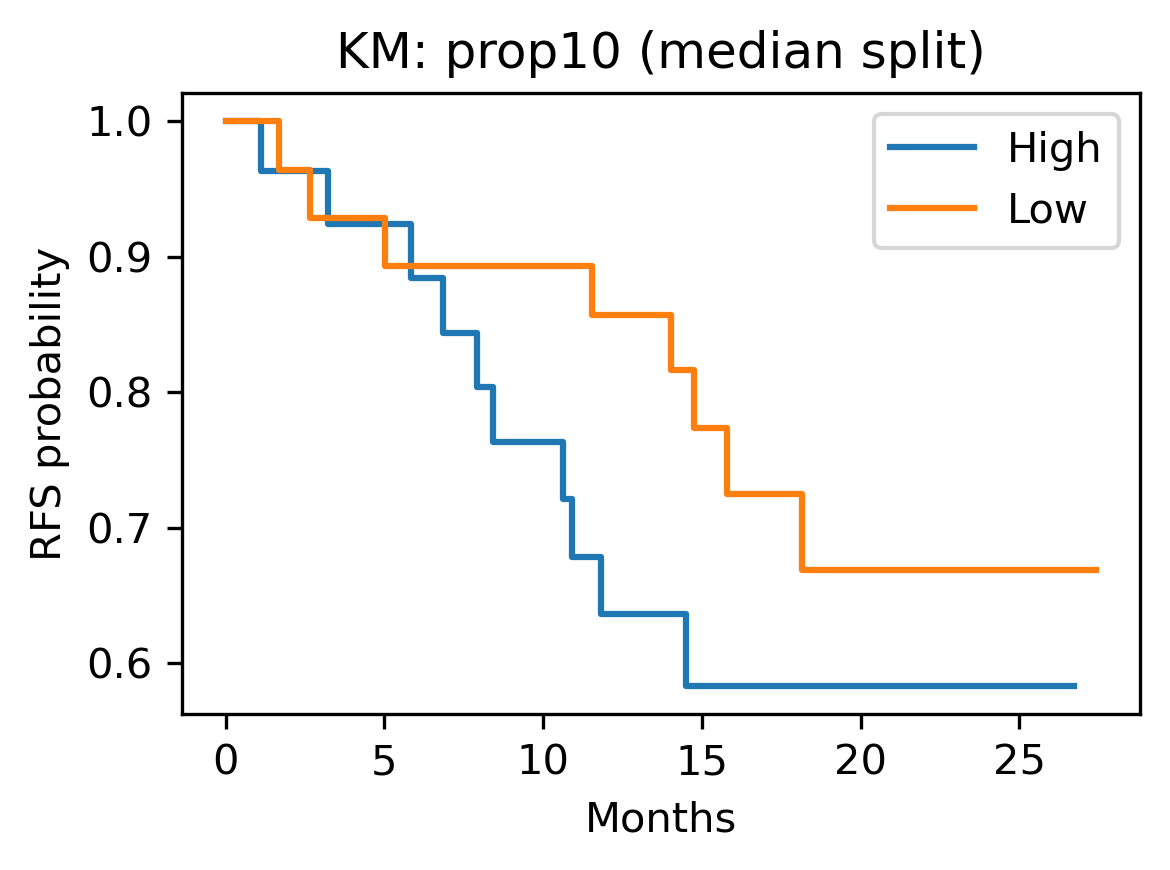

In [64]:
km_by_median(d_nmpr, 'prop10', time='time', event='event', label_hi='High', label_lo='Low')
